In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm as LN
from astropy.table import Table,vstack,unique
from glob import glob

In [2]:
flist = glob('tempestgatables6/t*')
flist.sort()
t1 = Table()
for file in flist:
    t = Table.read(file,format='ascii')
    t1 = vstack([t1,t])
t1.sort(['fit','run'])
t1

<Table length=450>
  run           r          ...       vdist              fit        
float64      float64       ...      float64           float64      
------- ------------------ ... ----------------- ------------------
 9383.0  43.61374254357911 ... 73.84840174410805  35.18249421326657
 9405.0 43.998539539980406 ... 67.21144395283775  35.29450244791347
 9365.0  41.73135813808037 ... 74.46844631595475  35.33534192406309
 9275.0  43.31426905437151 ... 86.36656827936525 35.688617256201866
 9360.0  40.75466962486574 ... 91.83811833748099 35.796324706097344
 9354.0  43.22776763145218 ... 81.62809323810052 35.880983430998945
    ...                ... ...               ...                ...
 9692.0  42.54879155197944 ... 56.89864779012742  45.63609637656531
 9707.0  42.54879155197944 ... 56.89864779012742  45.63609637656531
 9722.0  42.54879155197944 ... 56.89864779012742  45.63609637656531
 9737.0  42.54879155197944 ... 56.89864779012742  45.63609637656531
 9752.0  42.54879155197944 ... 56.89864779012742  45.63609637656531
 9764.0  41.20896594601709 ...  52.2430939784829  45.86611809352256
 9767.0  41.20896594601709 ...  52.2430939784829  45.86611809352256

In [3]:
t2 = unique(t1,keys=['r','d','v','beta','delta','theta','phi'],keep='last')
t2.sort('fit')
t2.reverse()
t2

<Table length=421>
  run           r          ...       vdist              fit        
float64      float64       ...      float64           float64      
------- ------------------ ... ----------------- ------------------
 9767.0  41.20896594601709 ...  52.2430939784829  45.86611809352256
 9752.0  42.54879155197944 ... 56.89864779012742  45.63609637656531
 9716.0 43.714026116414715 ... 56.28222865657835  45.35506849233042
 9732.0  40.96330617822708 ... 88.84217555137165  45.27587413869116
 9724.0 40.194311450331654 ...  85.0527673405226  45.13046283083692
 9524.0  40.44873211759527 ... 67.86208958419664 45.038291121833694
    ...                ... ...               ...                ...
 9278.0  42.15047593013759 ... 82.54076443780095  36.02362442498084
 9354.0  43.22776763145218 ... 81.62809323810052 35.880983430998945
 9360.0  40.75466962486574 ... 91.83811833748099 35.796324706097344
 9275.0  43.31426905437151 ... 86.36656827936525 35.688617256201866
 9365.0  41.73135813808037 ... 74.46844631595475  35.33534192406309
 9405.0 43.998539539980406 ... 67.21144395283775  35.29450244791347
 9383.0  43.61374254357911 ... 73.84840174410805  35.18249421326657

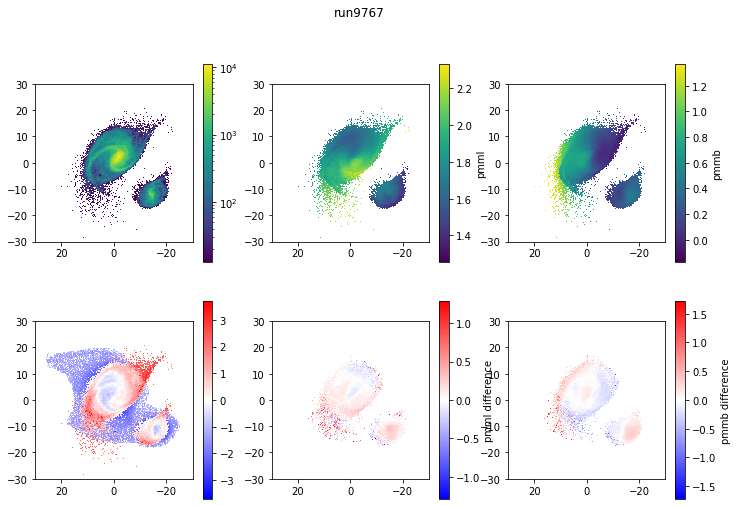

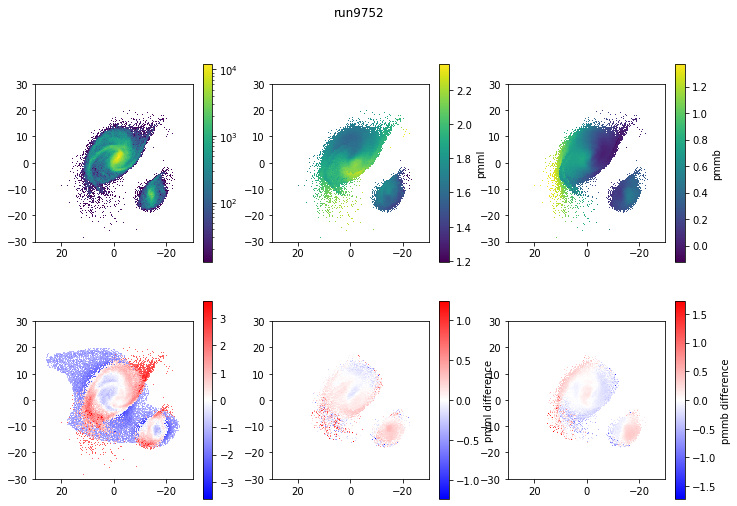

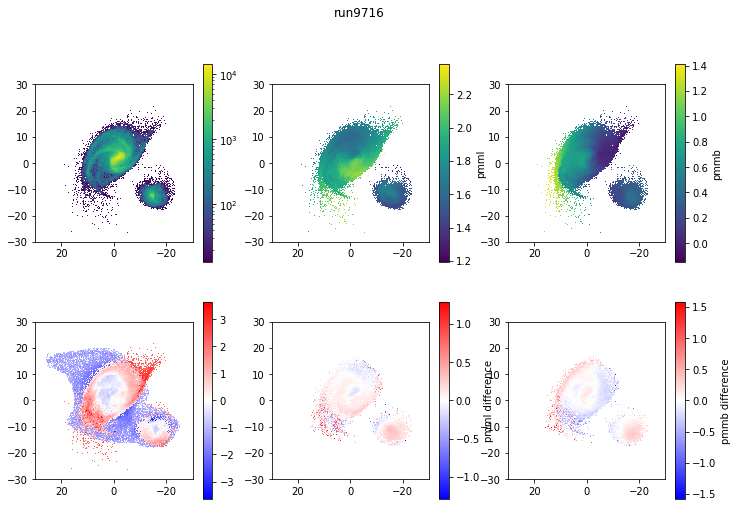

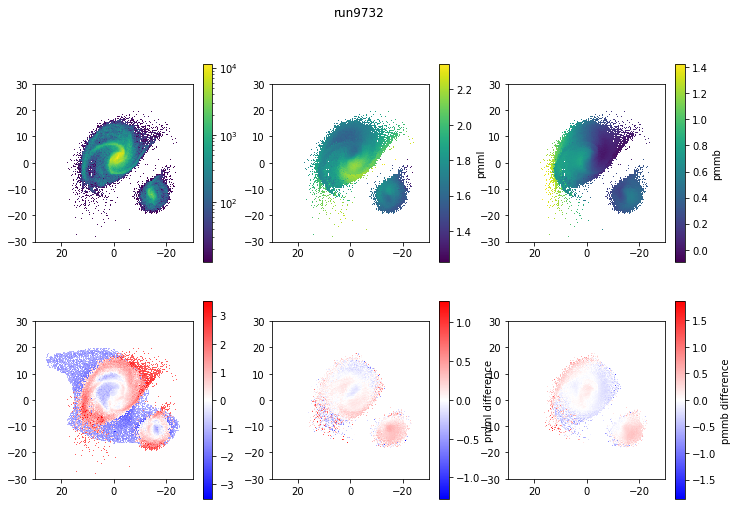

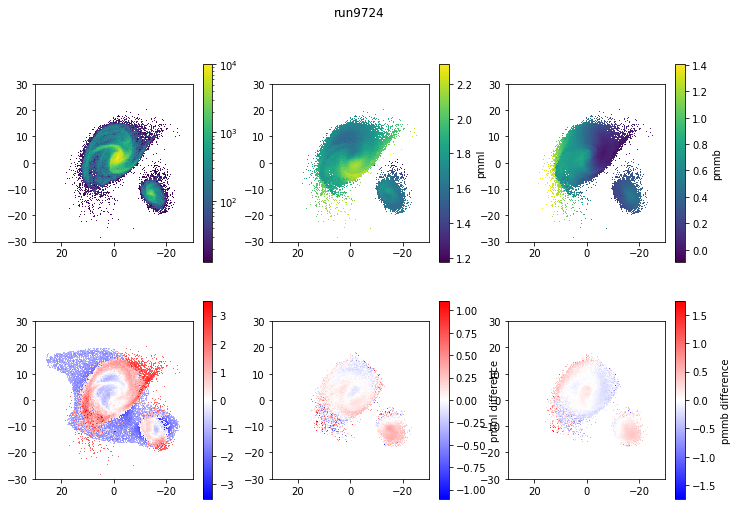

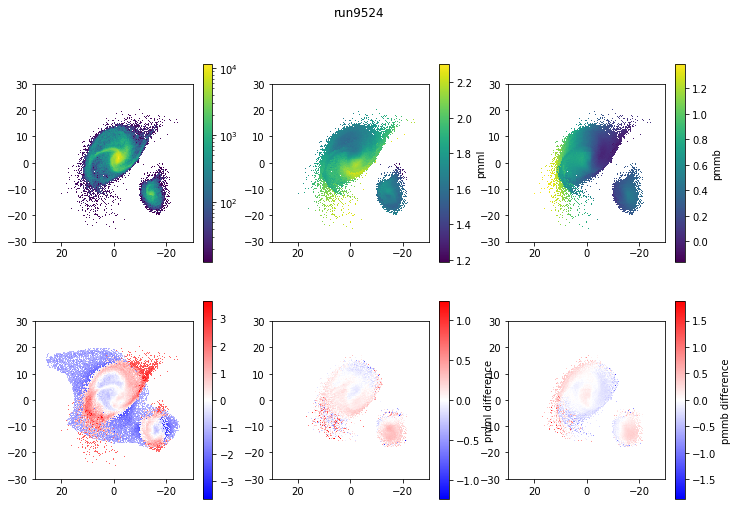

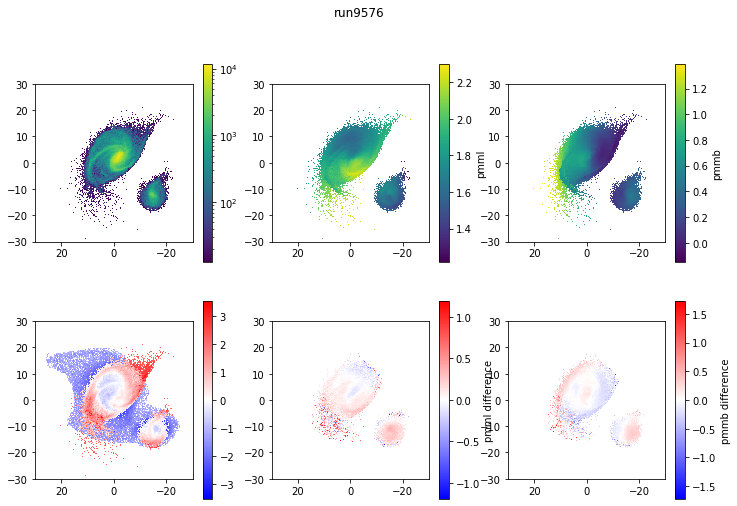

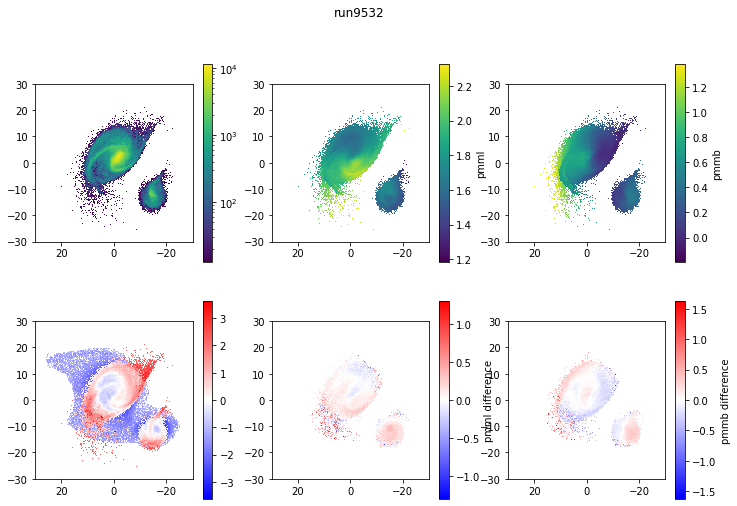

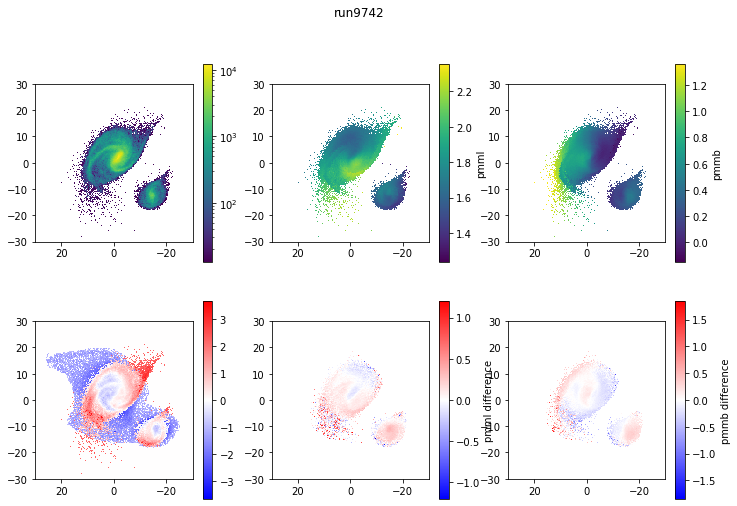

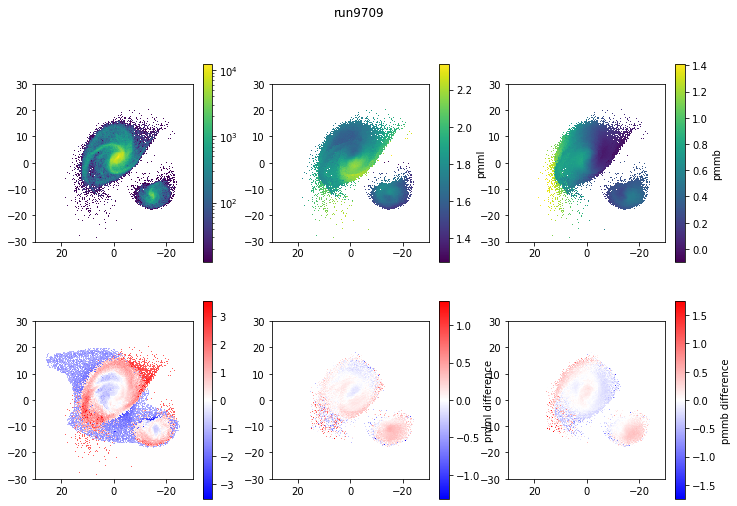

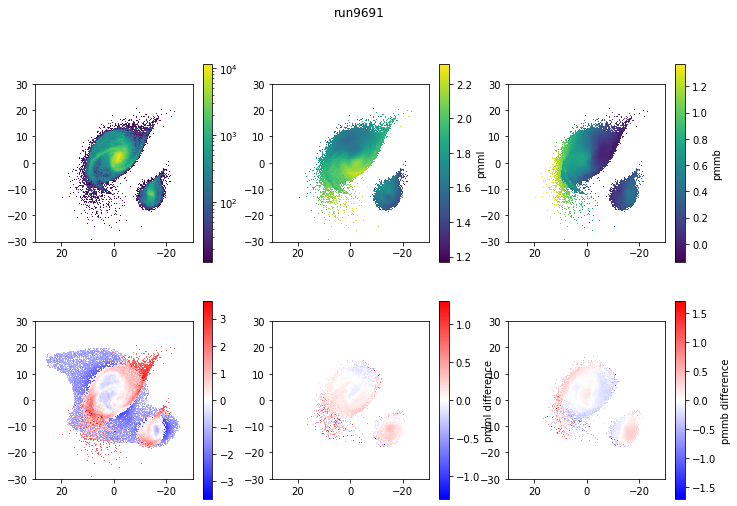

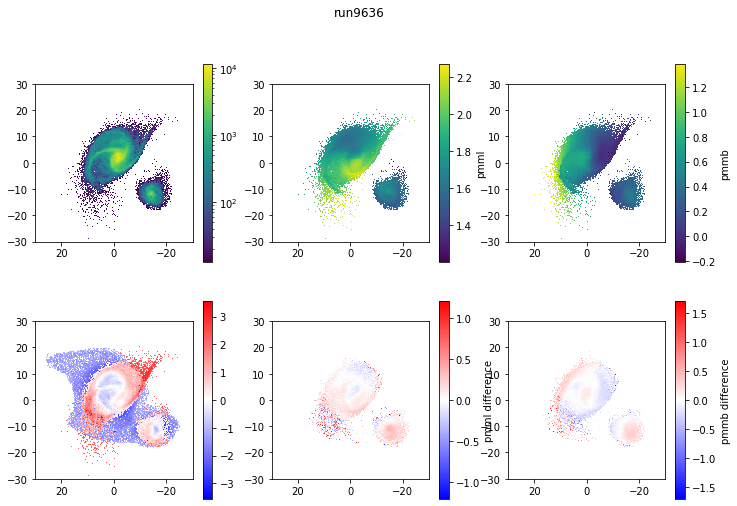

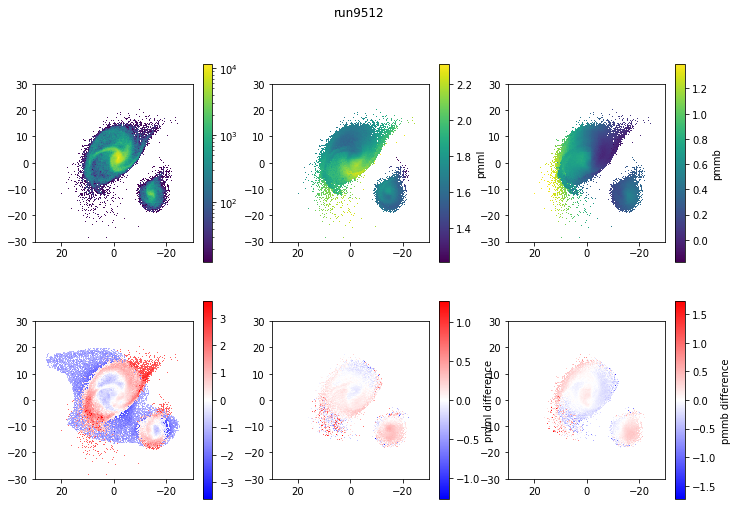

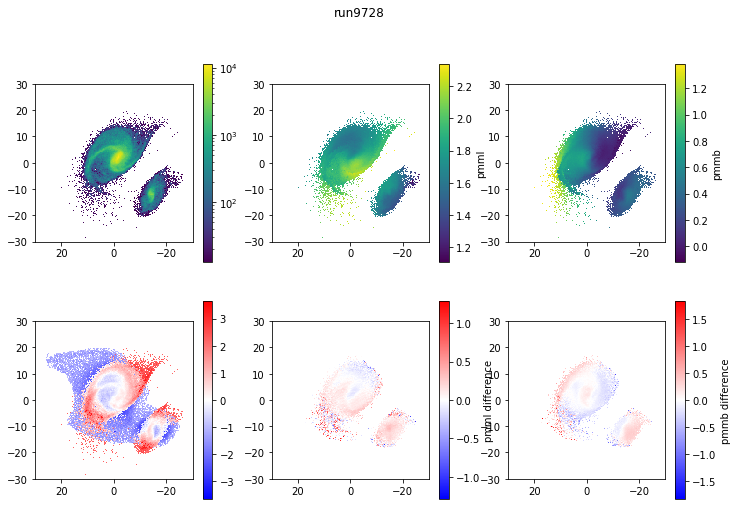

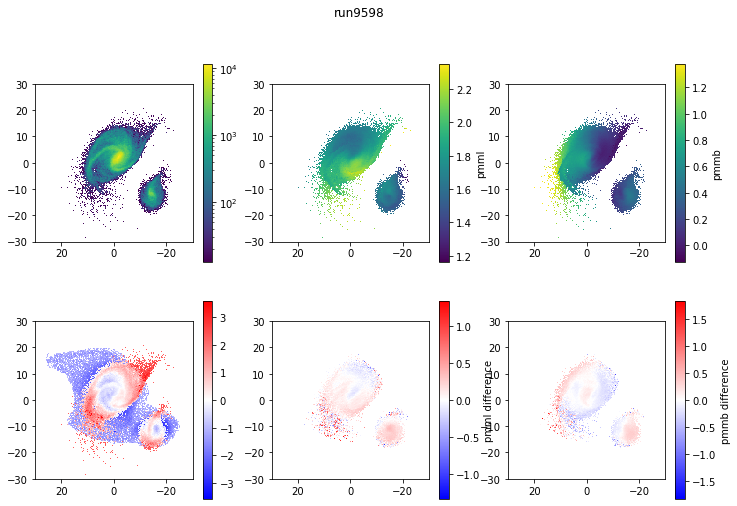

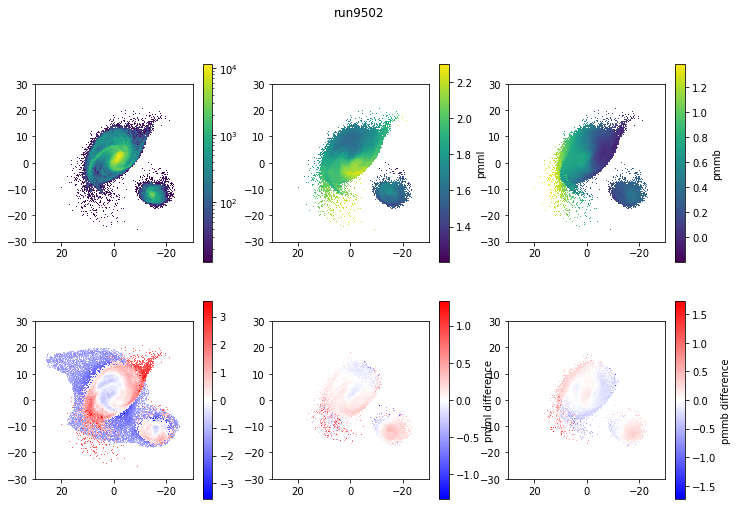

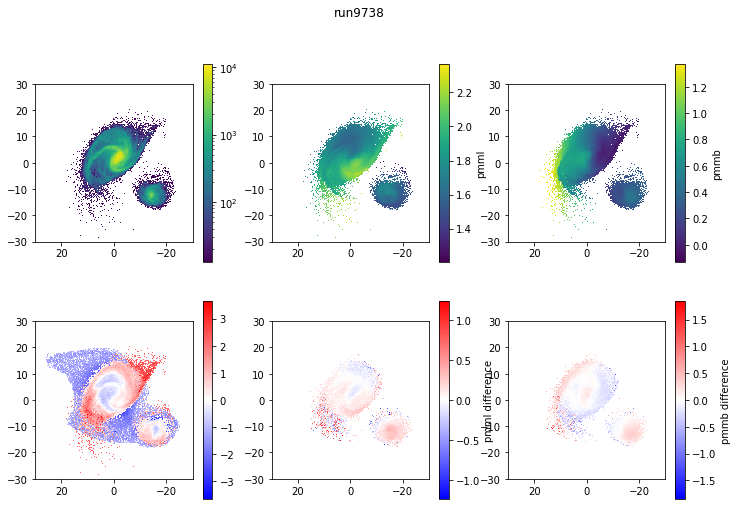

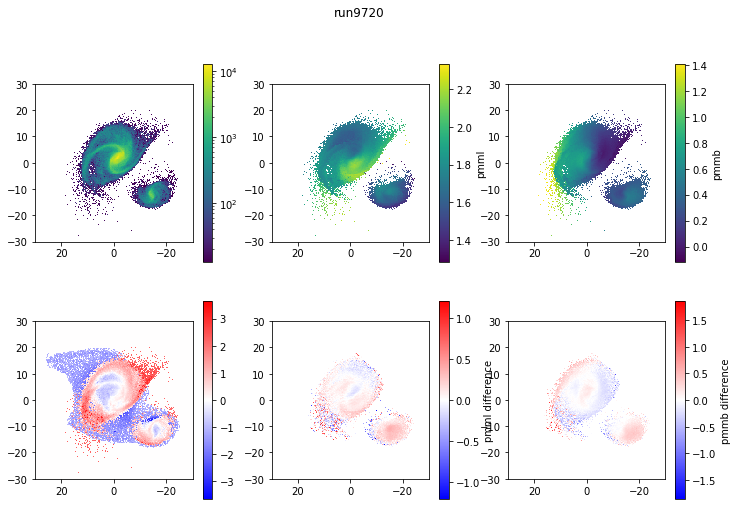

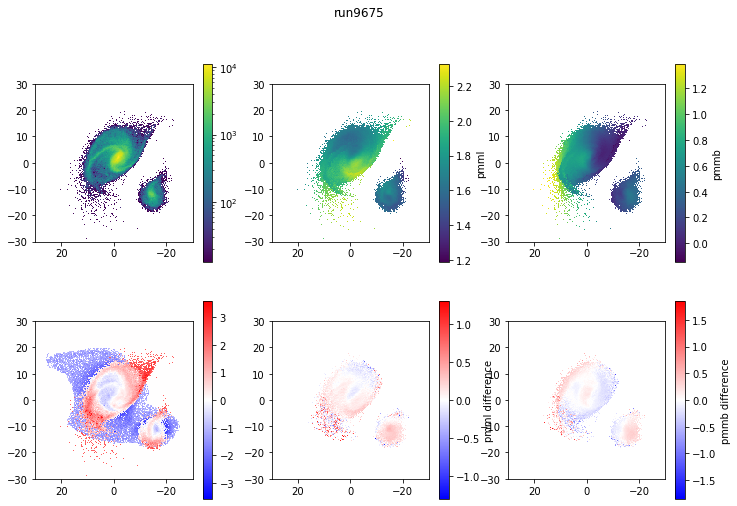

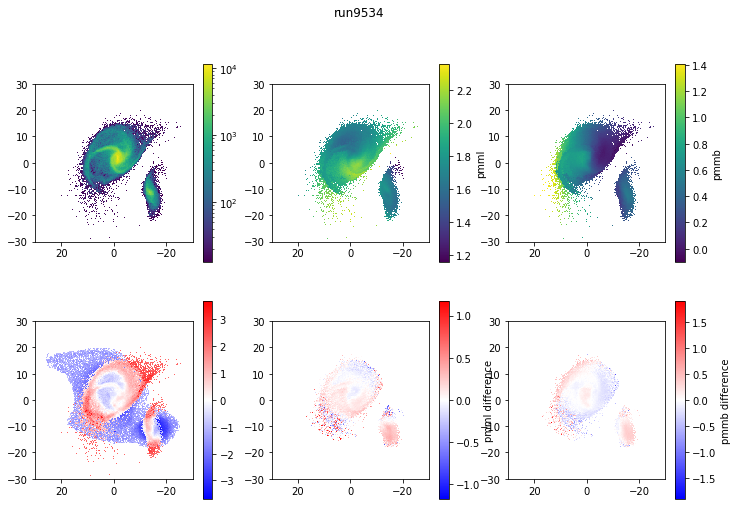

In [4]:
t3 = t2[:20]
extent = [-30,30,-30,30]
for line in t3:
    im1 = np.load('imfiles2/run{}.npy'.format(int(line['run'])))
    im4 = np.load('imfiles2/run{}.npy'.format(int(line['run'])))
    plt.figure(figsize=(12,8))
    plt.subplot(2,3,1)
    im1[(np.where(im1==0.1))] = 0
    plt.imshow(im1.T,origin='lower',extent=extent,norm=LN(),interpolation='none')
    plt.xlim((30,-30))
    plt.colorbar()
    plt.subplot(2,3,2)
    im2 = np.load('imfiles2/run{}pmml.npy'.format(int(line['run'])))
    plt.imshow(im2.T,origin='lower',extent=extent,interpolation='none')
    plt.xlim((30,-30))
    plt.colorbar(label='pmml')
    plt.subplot(2,3,3)
    im3 = np.load('imfiles2/run{}pmmb.npy'.format(int(line['run'])))
    plt.imshow(im3.T,origin='lower',extent=extent,interpolation='none')
    plt.xlim((30,-30))
    plt.colorbar(label='pmmb')
    plt.subplot(2,3,4)
    g1 = np.load('gaiamap.npy')
    im5 = np.log10(im4)-np.log10(g1)
    vv1 = np.max(np.abs(im5))
    plt.imshow(im5.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv1,vmax=vv1)
    plt.xlim((30,-30))
    plt.colorbar()
    plt.subplot(2,3,5)
    g2 = np.load('gaiapmml.npy'.format(int(line['run'])))
    im6 = im2-g2
    vv2 = np.max(np.abs(im6[np.where(~np.isnan(im6))]))
    plt.imshow(im6.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv2,vmax=vv2)
    plt.xlim((30,-30))
    plt.colorbar(label='pmml difference')
    plt.subplot(2,3,6)
    g3 = np.load('gaiapmmb.npy'.format(int(line['run'])))
    im7 = im3-g3
    vv3 = np.max(np.abs(im7[np.where(~np.isnan(im7))]))
    plt.imshow(im7.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv3,vmax=vv3)
    plt.xlim((30,-30))
    plt.colorbar(label='pmmb difference')
    plt.suptitle('run{}'.format(int(line['run'])))

In [5]:
t3

<Table length=20>
  run           r          ...       vdist               fit        
float64      float64       ...      float64            float64      
------- ------------------ ... ------------------ ------------------
 9767.0  41.20896594601709 ...   52.2430939784829  45.86611809352256
 9752.0  42.54879155197944 ...  56.89864779012742  45.63609637656531
 9716.0 43.714026116414715 ...  56.28222865657835  45.35506849233042
 9732.0  40.96330617822708 ...  88.84217555137165  45.27587413869116
 9724.0 40.194311450331654 ...   85.0527673405226  45.13046283083692
 9524.0  40.44873211759527 ...  67.86208958419664 45.038291121833694
    ...                ... ...                ...                ...
 9728.0  41.50615831312656 ... 61.099304525949314   44.5865403072041
 9598.0  42.49200909665026 ...  58.74732551614381 44.552558994422355
 9502.0  42.94853351383893 ... 51.889930316623385    44.548244646616
 9738.0  40.94981834397627 ... 63.321243284277216  44.41666717114727
 9720.0 42.023750209853894 ...  77.57393766399753  44.38995916454881
 9675.0  42.19965014150355 ... 58.311328922045895  44.35498348392713
 9534.0  40.95137038620076 ...  83.40531447256708 44.318018186549196

In [2]:
flist = glob('tempestgatables7/t*')
flist.sort()
t1 = Table()
for file in flist:
    t = Table.read(file,format='ascii')
    t1 = vstack([t1,t])
t1.sort(['fit','run'])
t1

<Table length=660>
  run           r          ...       vdist                fit         
float64      float64       ...      float64             float64       
------- ------------------ ... ------------------ --------------------
 9834.0    40.842071277869 ...  79.57464103106709   0.0386011710819431
 9874.0 41.105379591996275 ... 103.56517147723203  0.04109677124749038
 9798.0  42.03950922944885 ... 55.914492364938205  0.04226649383230972
 9790.0  39.43760626821967 ...  99.17899453524255  0.04262513605951663
10029.0  41.54277384753594 ...  83.74163106670524 0.042708535907016884
 9809.0  38.74433349928284 ...  92.66299935432261  0.04297904840999919
    ...                ... ...                ...                  ...
10337.0 43.655980600594276 ...  36.61251364329435    21.28480721811717
10352.0 43.655980600594276 ...  36.61251364329435    21.28480721811717
10367.0 43.655980600594276 ...  36.61251364329435    21.28480721811717
10382.0 43.655980600594276 ...  36.61251364329435    21.28480721811717
10397.0 43.655980600594276 ...  36.61251364329435    21.28480721811717
10412.0 43.655980600594276 ...  36.61251364329435    21.28480721811717
10427.0 43.655980600594276 ...  36.61251364329435    21.28480721811717

In [3]:
t2 = unique(t1,keys=['r','d','v','beta','delta','theta','phi'],keep='last')
t2.sort('fit')
t2.reverse()
t2

<Table length=617>
  run           r          ...       vdist                fit         
float64      float64       ...      float64             float64       
------- ------------------ ... ------------------ --------------------
10427.0 43.655980600594276 ...  36.61251364329435    21.28480721811717
10398.0 47.424765672284664 ...  30.47358566957285    21.21514624547986
10292.0  47.72856985336037 ...  32.10695599903502   21.122122361541944
10384.0 45.765238577211505 ...  38.71764765129052    20.27834724045508
10370.0 45.953950493418525 ...  39.03221991211171   20.226009713317094
10348.0  48.53568445115131 ... 32.693925511321744   19.751573378438803
    ...                ... ...                ...                  ...
 9786.0   39.7556242611925 ...  84.67566887795627 0.043536783950809364
 9809.0  38.74433349928284 ...  92.66299935432261  0.04297904840999919
10029.0  41.54277384753594 ...  83.74163106670524 0.042708535907016884
 9790.0  39.43760626821967 ...  99.17899453524255  0.04262513605951663
 9798.0  42.03950922944885 ... 55.914492364938205  0.04226649383230972
 9874.0 41.105379591996275 ... 103.56517147723203  0.04109677124749038
 9834.0    40.842071277869 ...  79.57464103106709   0.0386011710819431

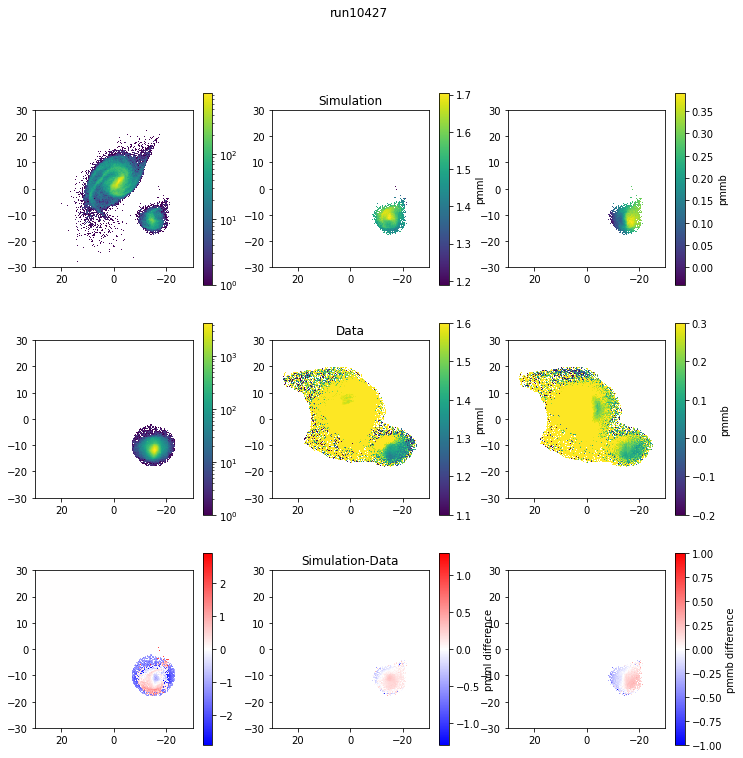

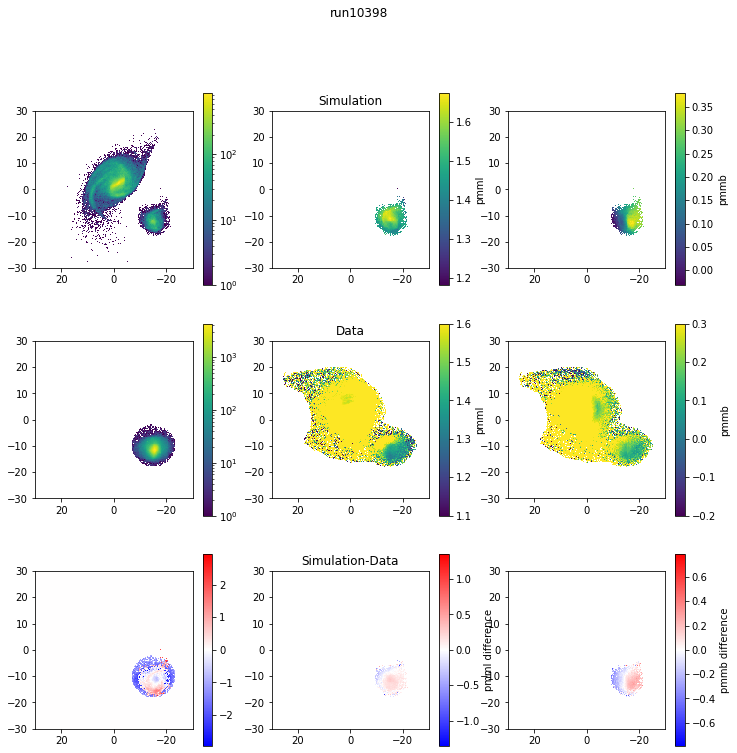

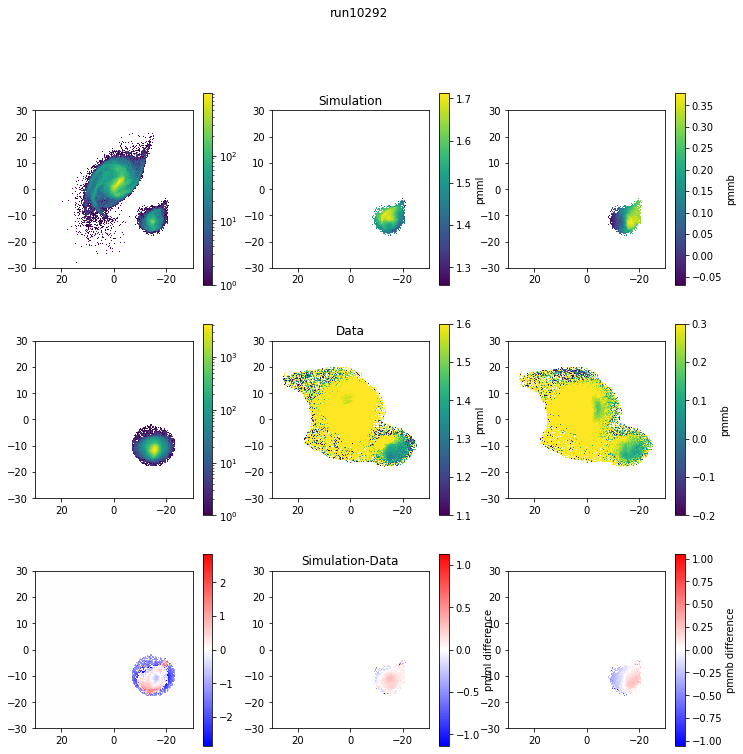

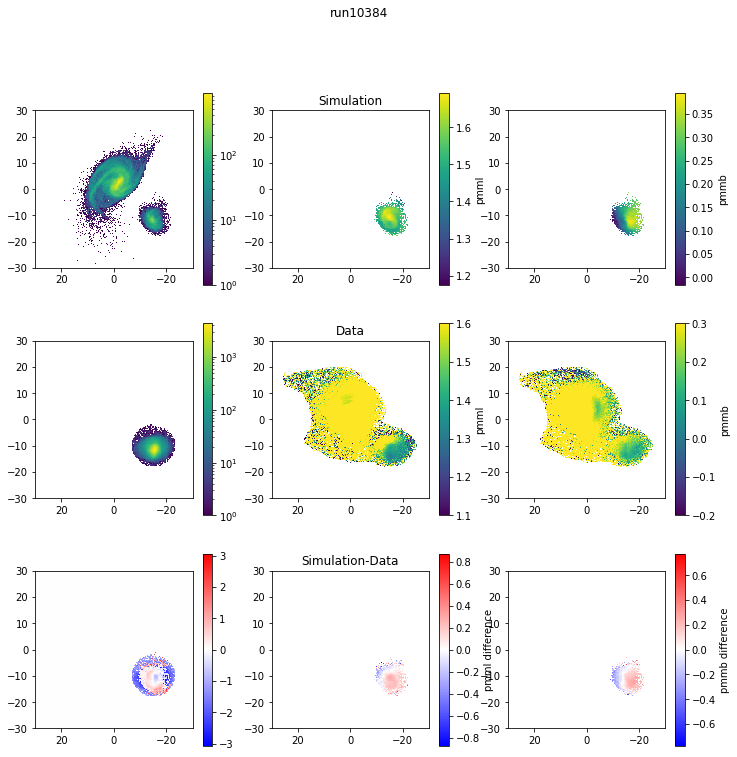

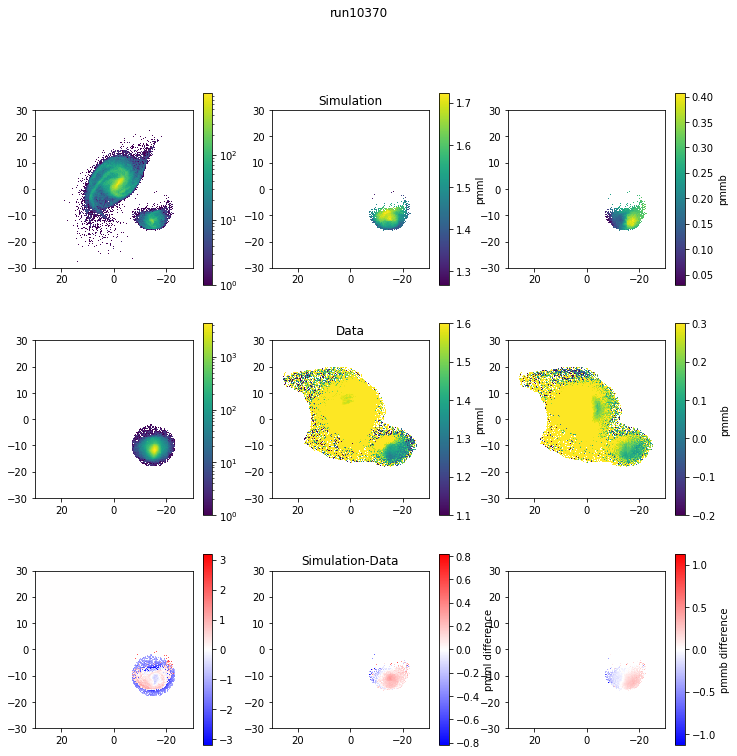

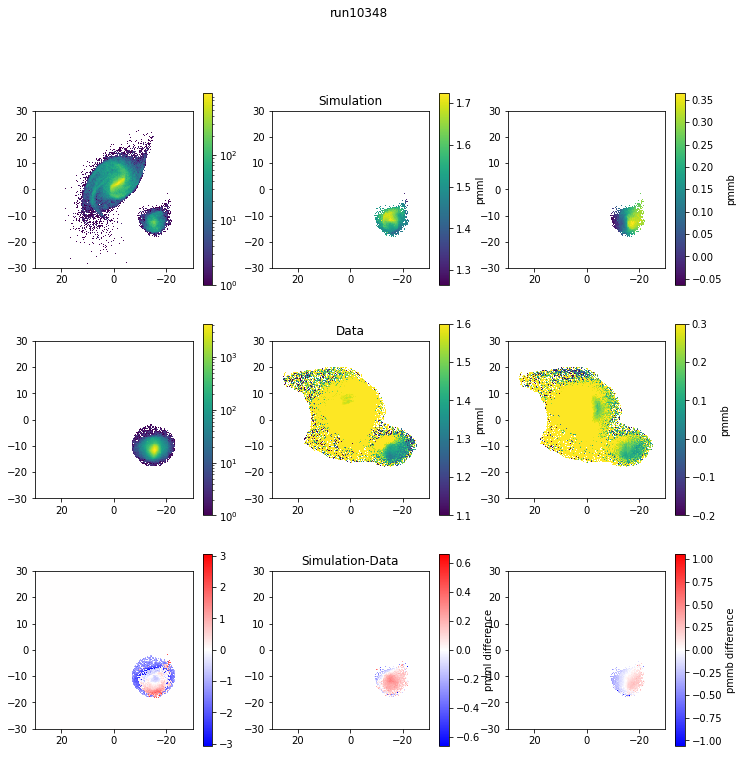

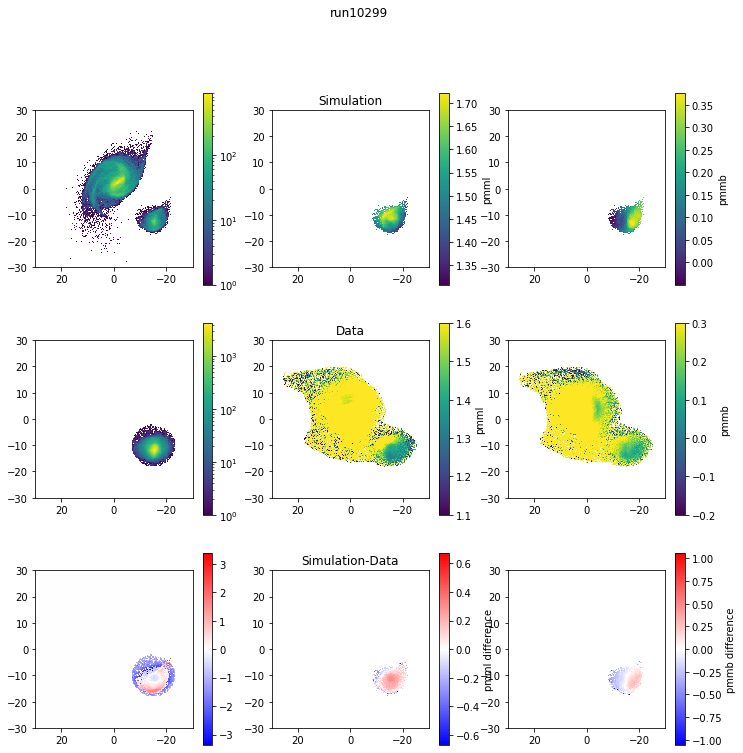

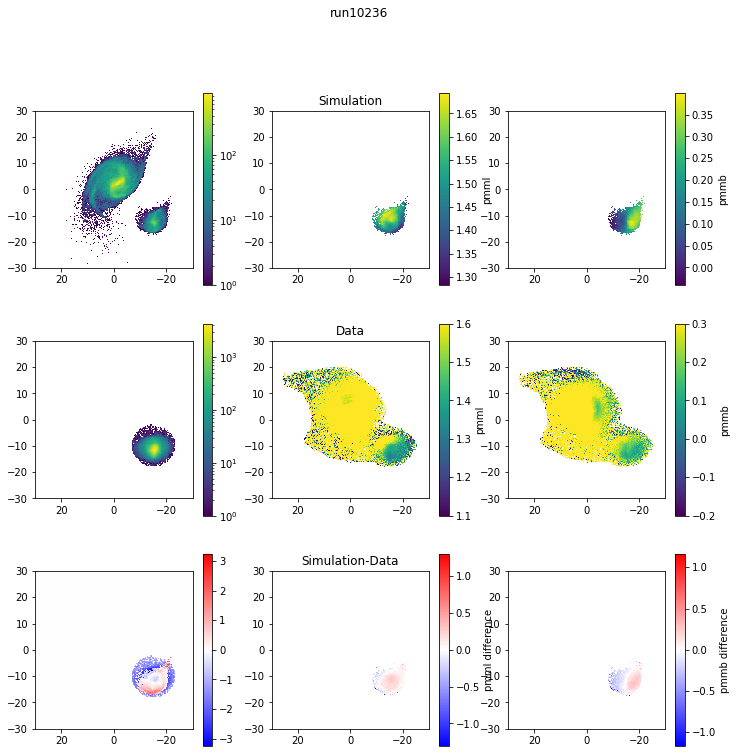

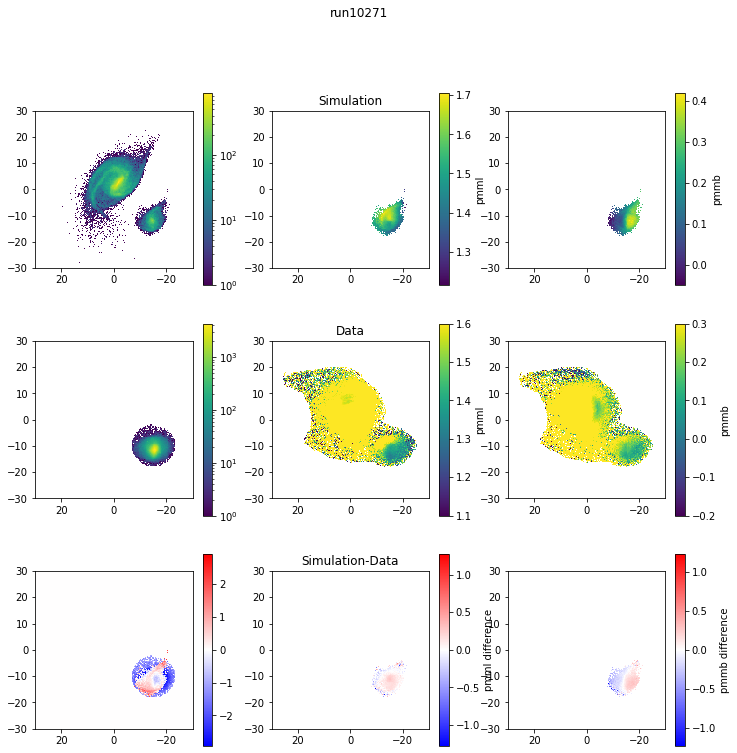

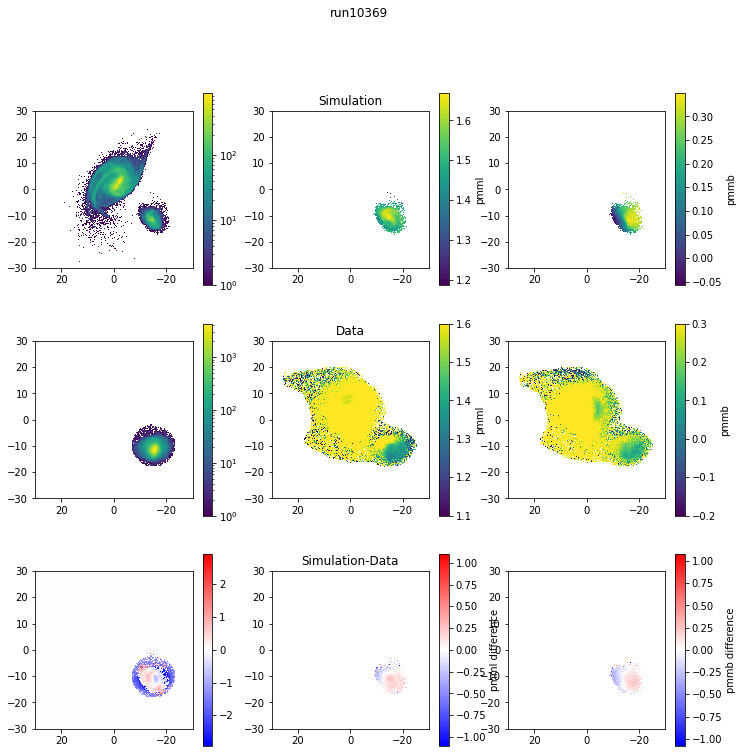

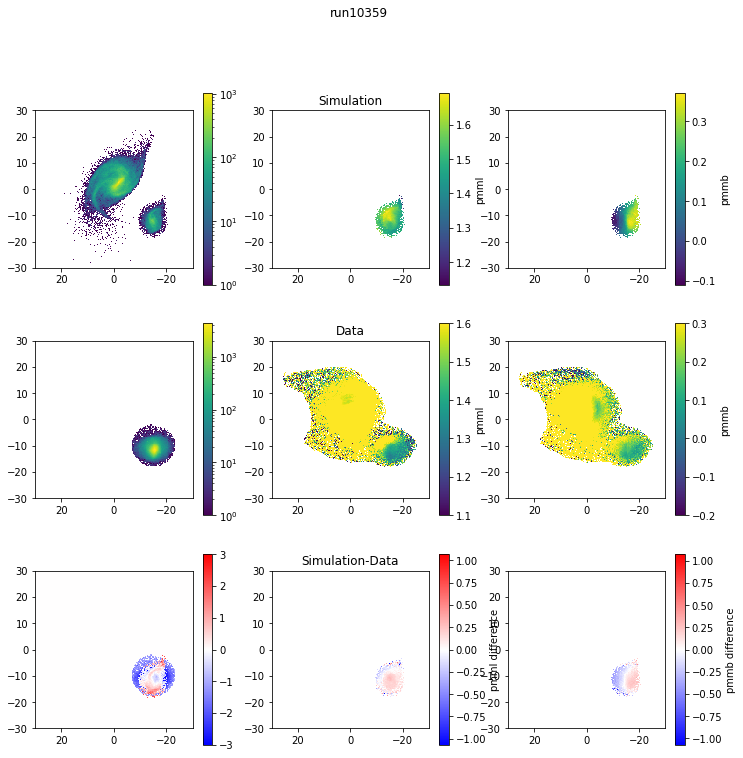

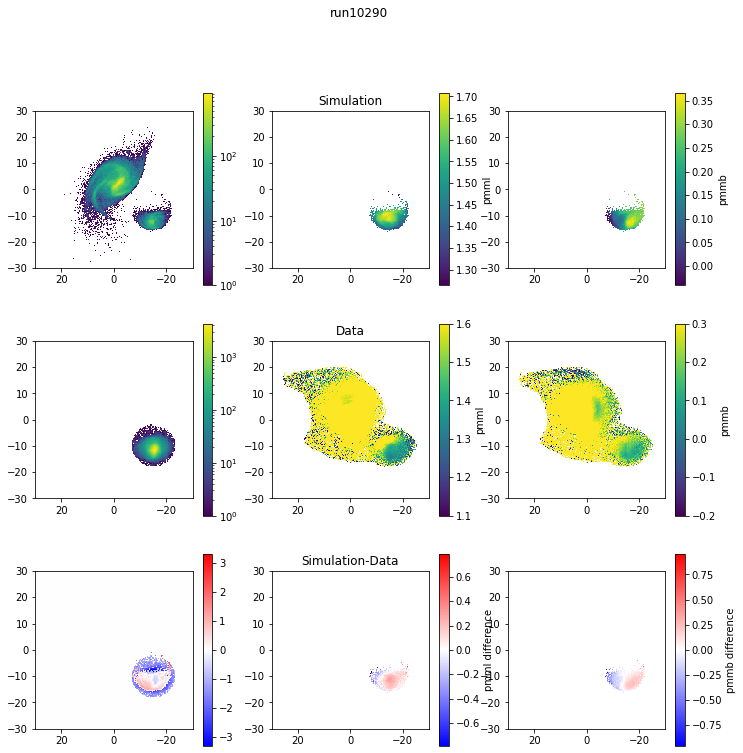

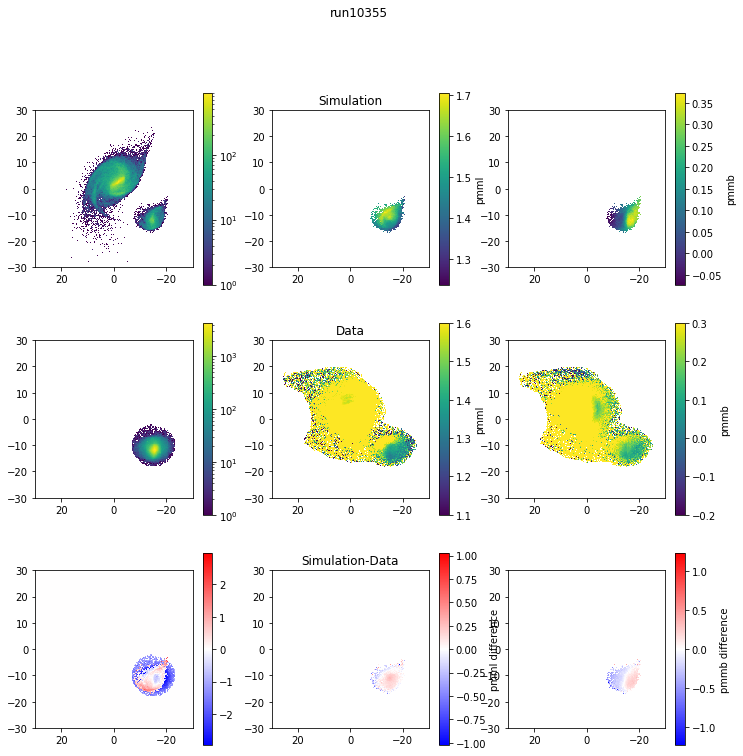

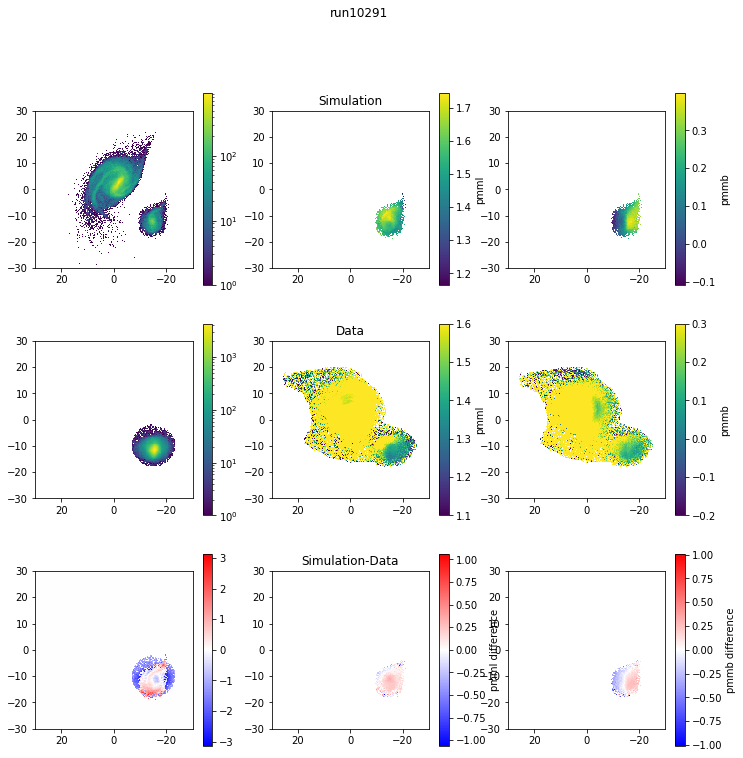

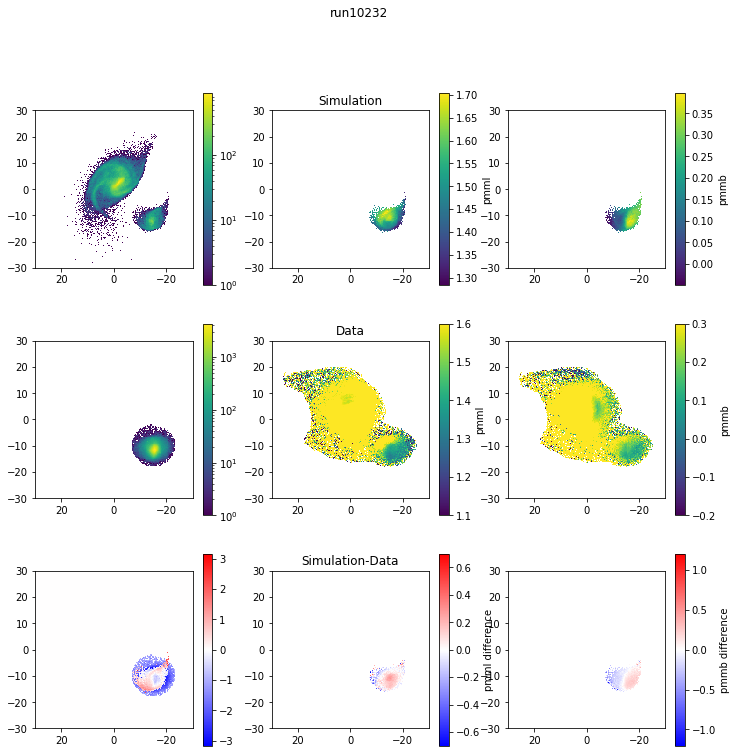

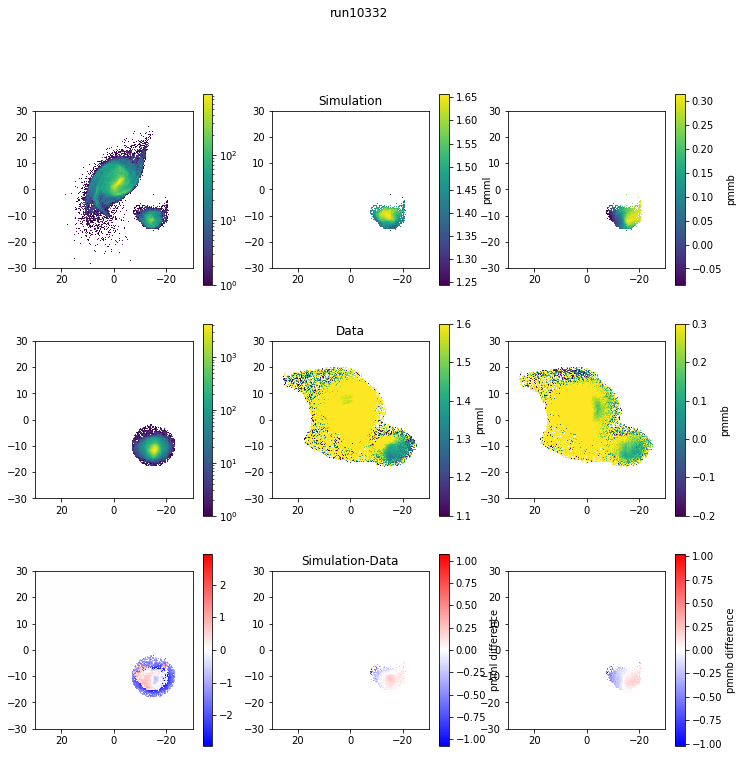

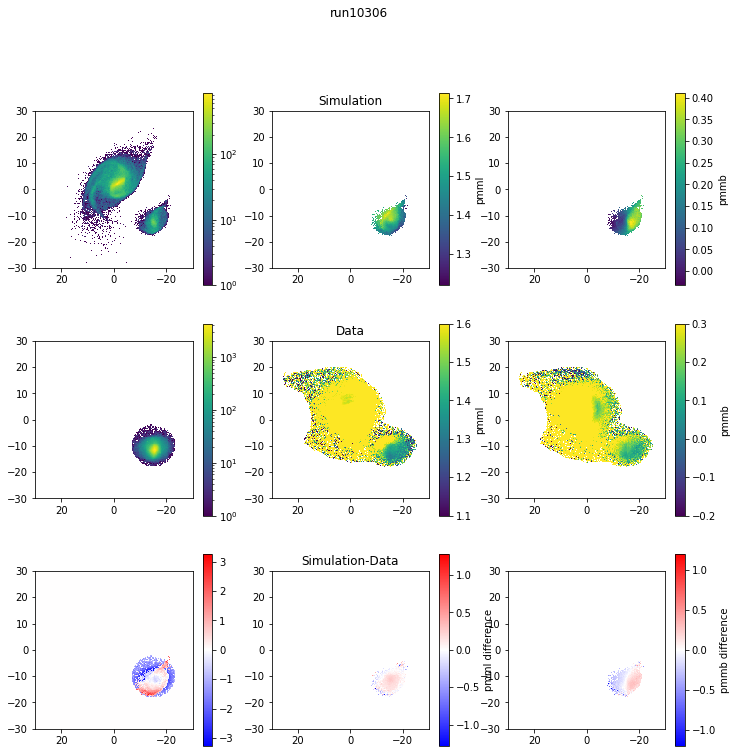

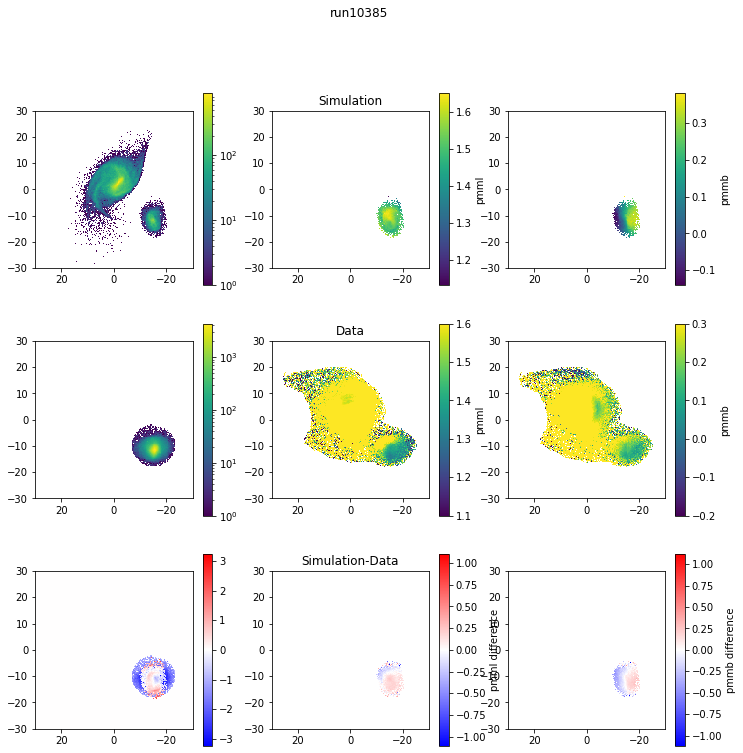

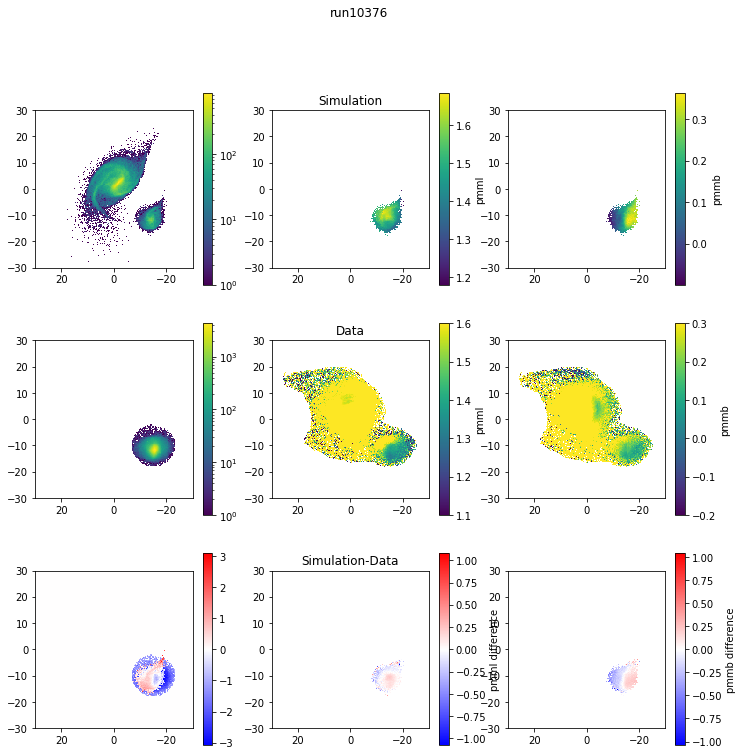

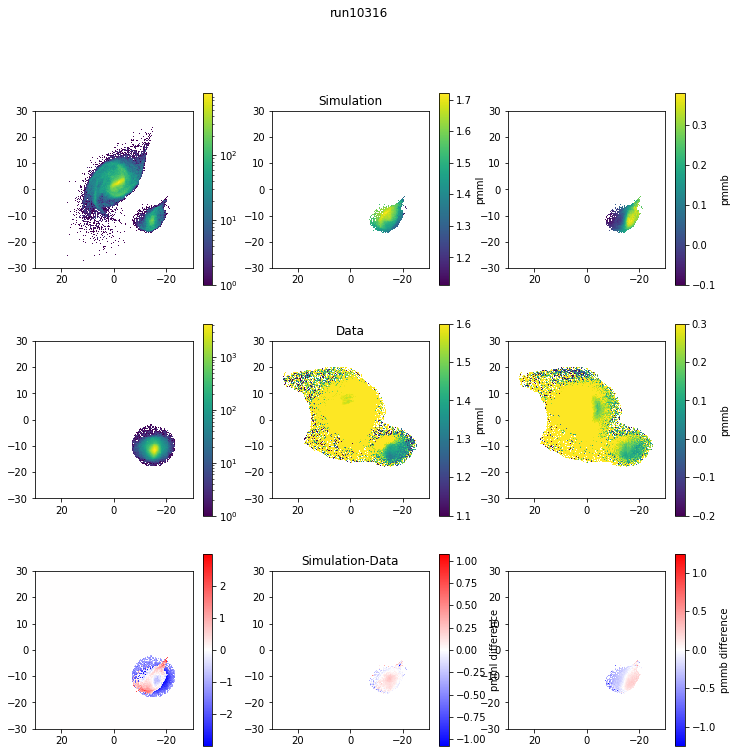

In [14]:
t3 = t2[:20]
extent = [-30,30,-30,30]
for line in t3:
    im1 = np.load('imfiles2/run{}a.npy'.format(int(line['run'])))
    im4 = np.load('imfiles2/run{}w.npy'.format(int(line['run'])))
    plt.figure(figsize=(12,12))
    plt.subplot(3,3,1)
    plt.imshow(im1.T,origin='lower',extent=extent,norm=LN(),interpolation='none')
    plt.xlim((30,-30))
    plt.colorbar()
    plt.subplot(3,3,2)
    im2 = np.load('imfiles2/run{}pmml.npy'.format(int(line['run'])))
    plt.imshow(im2.T,origin='lower',extent=extent,interpolation='none')
    plt.title('Simulation')
    plt.xlim((30,-30))
    plt.colorbar(label='pmml')
    plt.subplot(3,3,3)
    im3 = np.load('imfiles2/run{}pmmb.npy'.format(int(line['run'])))
    plt.imshow(im3.T,origin='lower',extent=extent,interpolation='none')
    plt.xlim((30,-30))
    plt.colorbar(label='pmmb')
    plt.subplot(3,3,7)
    g1 = np.load('gaiamapsmc.npy')
    im5 = np.log10(im4)-np.log10(g1)
    vv1 = np.max(np.abs(im5))
    plt.imshow(im5.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv1,vmax=vv1)
    plt.xlim((30,-30))
    plt.colorbar()
    plt.subplot(3,3,8)
    g2 = np.load('gaiapmml.npy'.format(int(line['run'])))
    im6 = im2-g2
    vv2 = np.max(np.abs(im6[np.where(~np.isnan(im6))]))
    plt.imshow(im6.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv2,vmax=vv2)
    plt.title('Simulation-Data')
    plt.xlim((30,-30))
    plt.colorbar(label='pmml difference')
    plt.subplot(3,3,9)
    g3 = np.load('gaiapmmb.npy'.format(int(line['run'])))
    im7 = im3-g3
    vv3 = np.max(np.abs(im7[np.where(~np.isnan(im7))]))
    g1[(np.where(g1==0.1))] = 0
    plt.imshow(im7.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv3,vmax=vv3)
    plt.xlim((30,-30))
    plt.colorbar(label='pmmb difference')
    plt.subplot(3,3,4)
    plt.imshow(g1.T,origin='lower',extent=extent,interpolation='none',norm=LN())
    plt.xlim((30,-30))
    plt.colorbar()
    plt.subplot(3,3,5)
    plt.imshow(g2.T,origin='lower',extent=extent,interpolation='none',vmin=1.1,vmax=1.6)
    plt.title('Data')
    plt.xlim((30,-30))
    plt.colorbar(label='pmml')
    plt.subplot(3,3,6)
    plt.imshow(g3.T,origin='lower',extent=extent,interpolation='none',vmin=-0.2,vmax=0.3)
    plt.xlim((30,-30))
    plt.colorbar(label='pmmb')
    plt.suptitle('run{}'.format(int(line['run'])))

In [5]:
t3

<Table length=20>
  run           r          ...       vdist               fit        
float64      float64       ...      float64            float64      
------- ------------------ ... ------------------ ------------------
10427.0 43.655980600594276 ...  36.61251364329435  21.28480721811717
10398.0 47.424765672284664 ...  30.47358566957285  21.21514624547986
10292.0  47.72856985336037 ...  32.10695599903502 21.122122361541944
10384.0 45.765238577211505 ...  38.71764765129052  20.27834724045508
10370.0 45.953950493418525 ...  39.03221991211171 20.226009713317094
10348.0  48.53568445115131 ... 32.693925511321744 19.751573378438803
    ...                ... ...                ...                ...
10291.0  45.09664336014366 ...  32.74959361727783 18.854205546109643
10232.0  46.14744753605186 ... 25.433671907171473 18.676948660699274
10332.0  48.55993328891389 ...   26.7953958765807  18.56536818601312
10306.0  46.99310861821688 ... 30.242604721321314 18.503643538287964
10385.0  47.39774897173798 ... 27.251897881314292 18.464462053636712
10376.0  46.34047417440952 ...  22.94803543597513  18.45000984726993
10316.0    50.019278154942 ... 30.026725969104348 18.323856183298155

In [2]:
flist = glob('tempestgatables8/t*')
flist.sort()
t1 = Table()
for file in flist:
    t = Table.read(file,format='ascii')
    t1 = vstack([t1,t])
t1.sort(['fit','run'])
t1

<Table length=450>
  run           r          ...       vdist               fit       
float64      float64       ...      float64            float64     
------- ------------------ ... ------------------ -----------------
10791.0  43.21612310431524 ...  36.40487792437154 9.539026610907086
11058.0  40.41924834459644 ...  37.24164508033774  9.54457182511987
11128.0 43.309677971425614 ... 33.315273862626604 9.584884138011622
11070.0  39.33836751701465 ...  50.43751921762055 9.602759347750604
11106.0  40.55748401104641 ... 35.058877377710026 9.649174331087066
11044.0  41.93834762805906 ... 34.774691096537815 9.655005461817586
    ...                ... ...                ...               ...
11027.0  41.46844535153189 ...  35.66590610628521 21.98461816860423
11042.0  41.46844535153189 ...  35.66590610628521 21.98461816860423
11057.0  41.46844535153189 ...  35.66590610628521 21.98461816860423
11072.0  41.46844535153189 ...  35.66590610628521 21.98461816860423
11087.0  41.46844535153189 ...  35.66590610628521 21.98461816860423
11102.0  41.46844535153189 ...  35.66590610628521 21.98461816860423
11117.0  41.46844535153189 ...  35.66590610628521 21.98461816860423

In [3]:
t2 = unique(t1,keys=['r','d','v','beta','delta','theta','phi'],keep='last')
t2.sort('fit')
t2.reverse()
t2

<Table length=421>
  run           r          ...       vdist               fit        
float64      float64       ...      float64            float64      
------- ------------------ ... ------------------ ------------------
11117.0  41.46844535153189 ...  35.66590610628521  21.98461816860423
11012.0  42.08733752740128 ...  44.62755092224645 21.879763502080245
10712.0  44.12549572376264 ...  34.17747820438842 21.793169098946226
11096.0 41.510856760124994 ... 24.307526706489373 21.764495264491345
10940.0 43.275912262606354 ...  36.52047647885123 21.759855606142406
10988.0  43.97422255231469 ...  36.06721154627602 21.742697858496758
    ...                ... ...                ...                ...
10753.0 44.078282063213344 ... 33.923768270737085  9.680318183683958
11044.0  41.93834762805906 ... 34.774691096537815  9.655005461817586
11106.0  40.55748401104641 ... 35.058877377710026  9.649174331087066
11070.0  39.33836751701465 ...  50.43751921762055  9.602759347750604
11128.0 43.309677971425614 ... 33.315273862626604  9.584884138011622
11058.0  40.41924834459644 ...  37.24164508033774   9.54457182511987
10791.0  43.21612310431524 ...  36.40487792437154  9.539026610907086

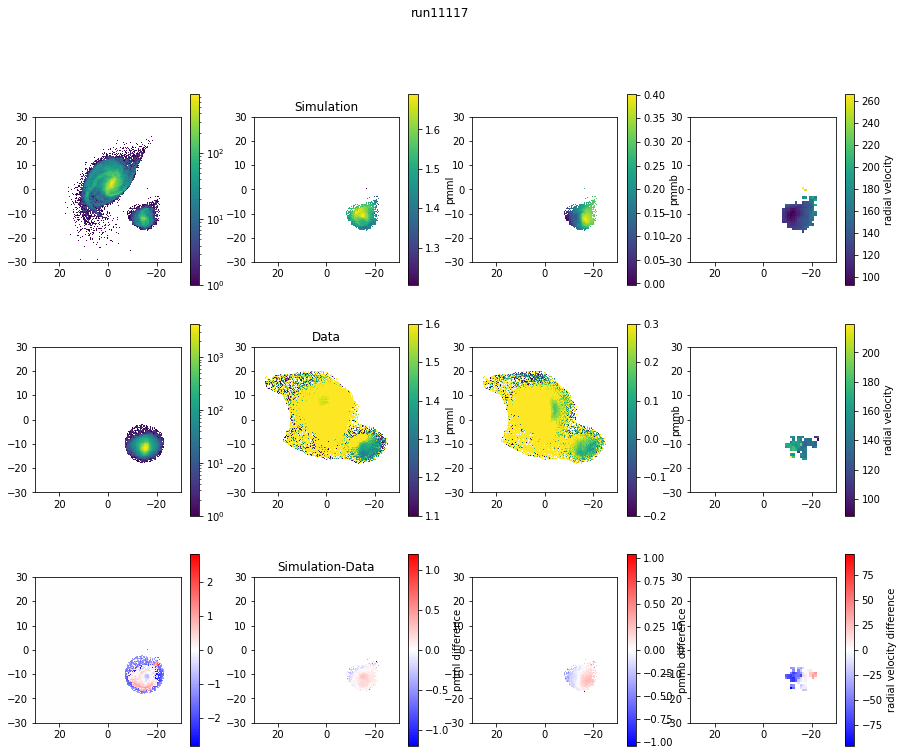

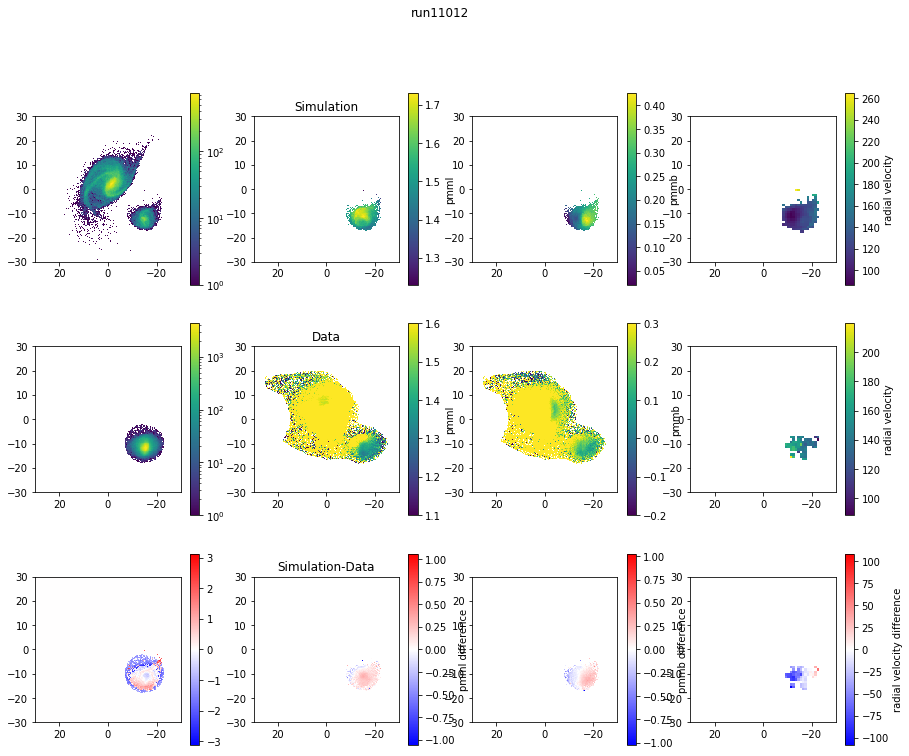

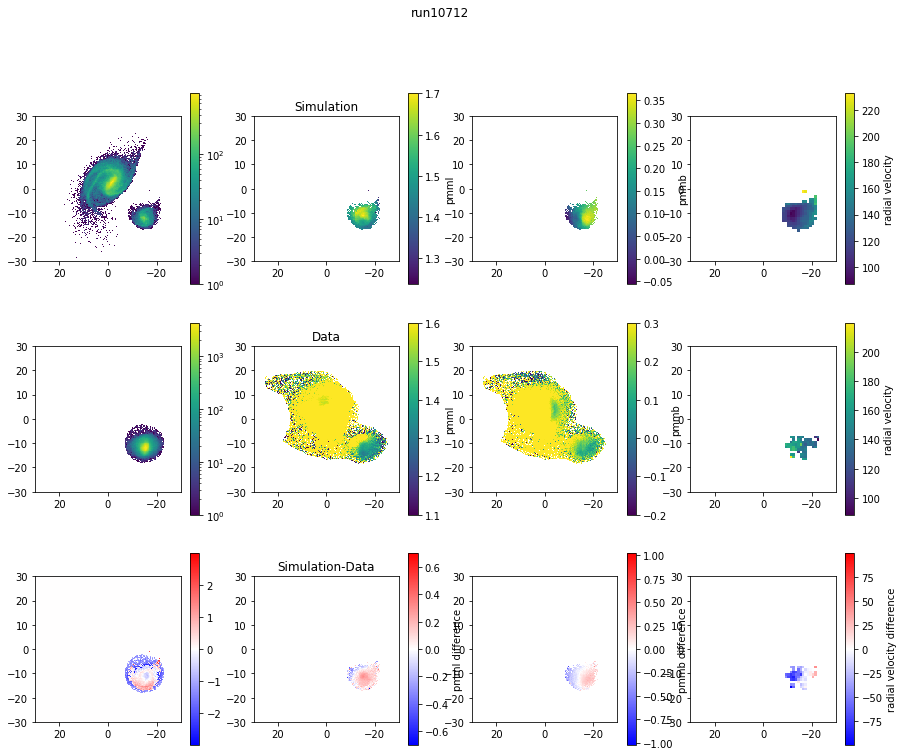

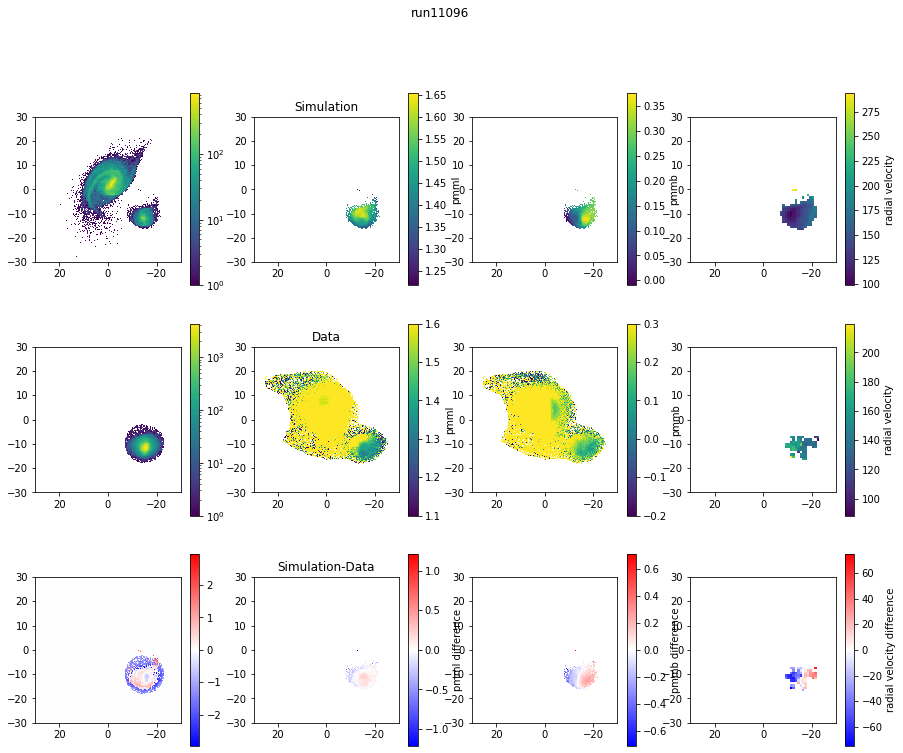

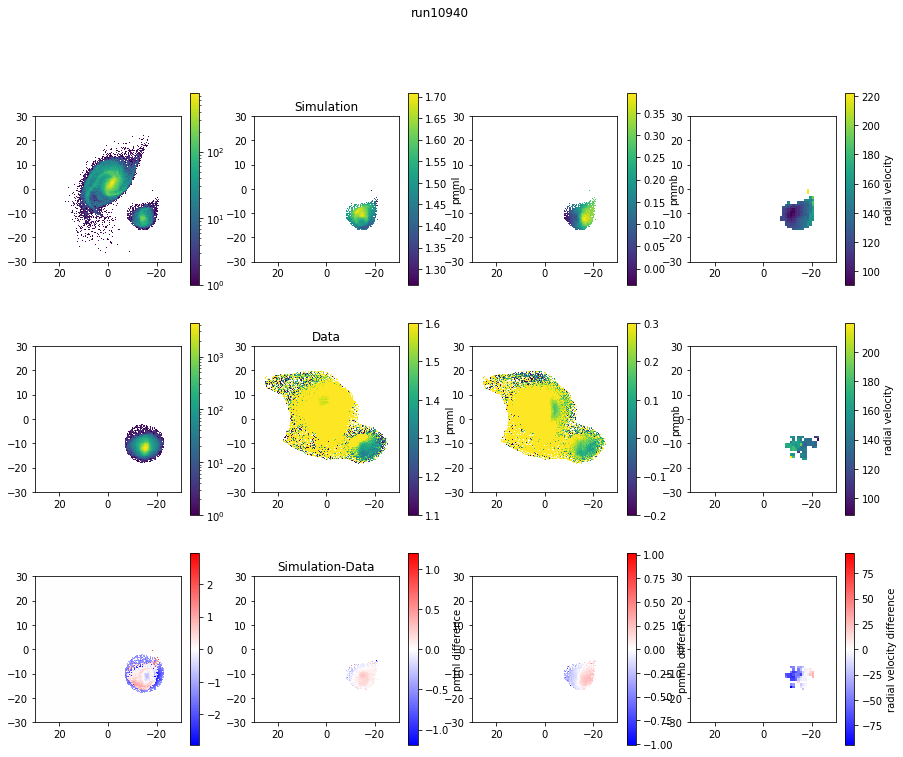

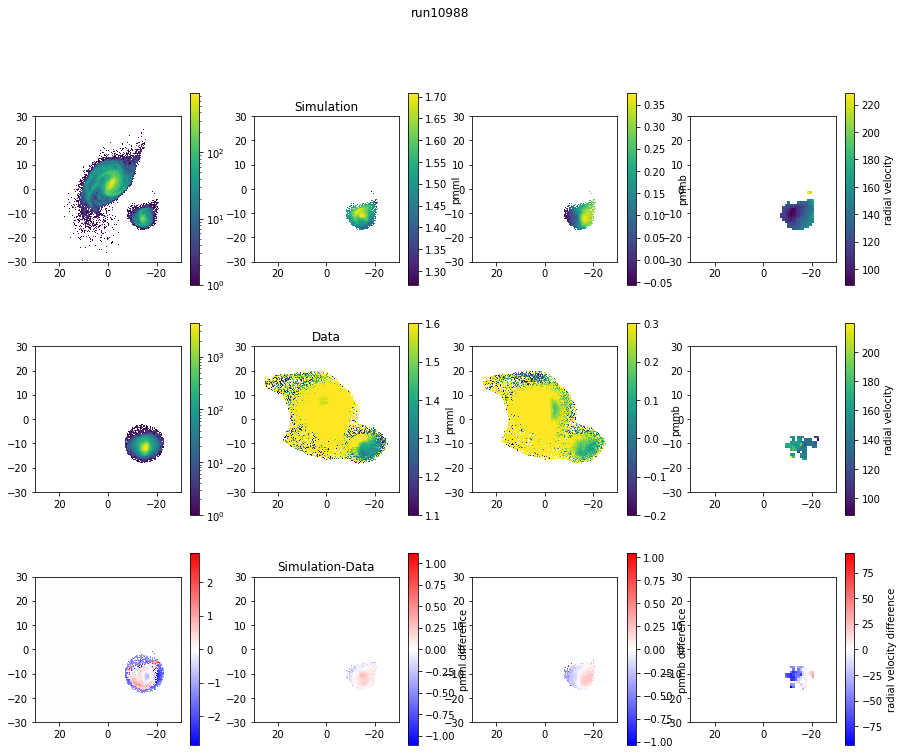

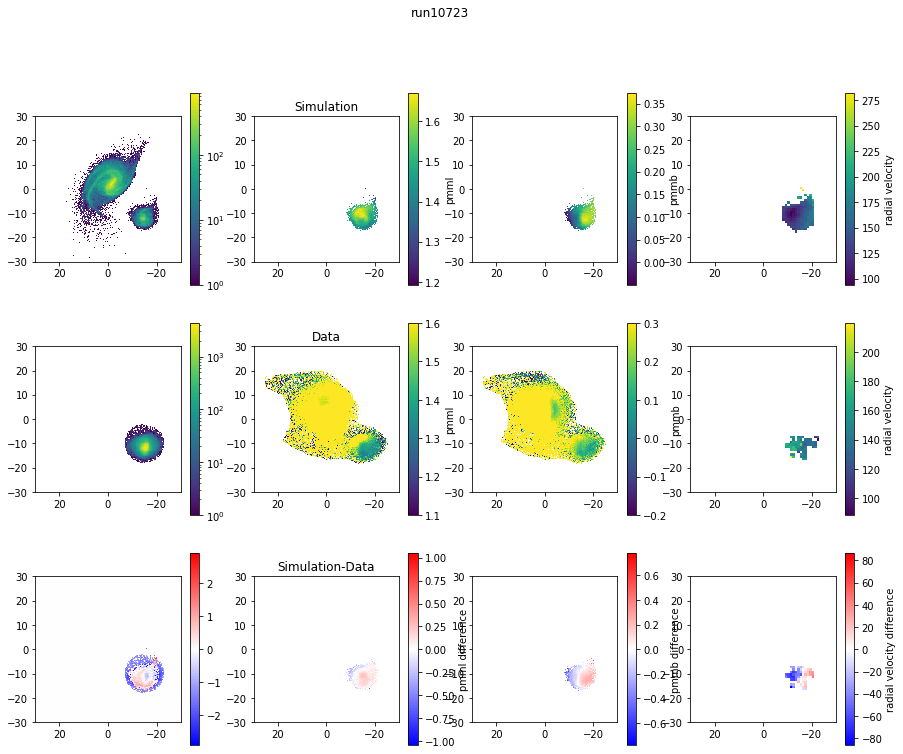

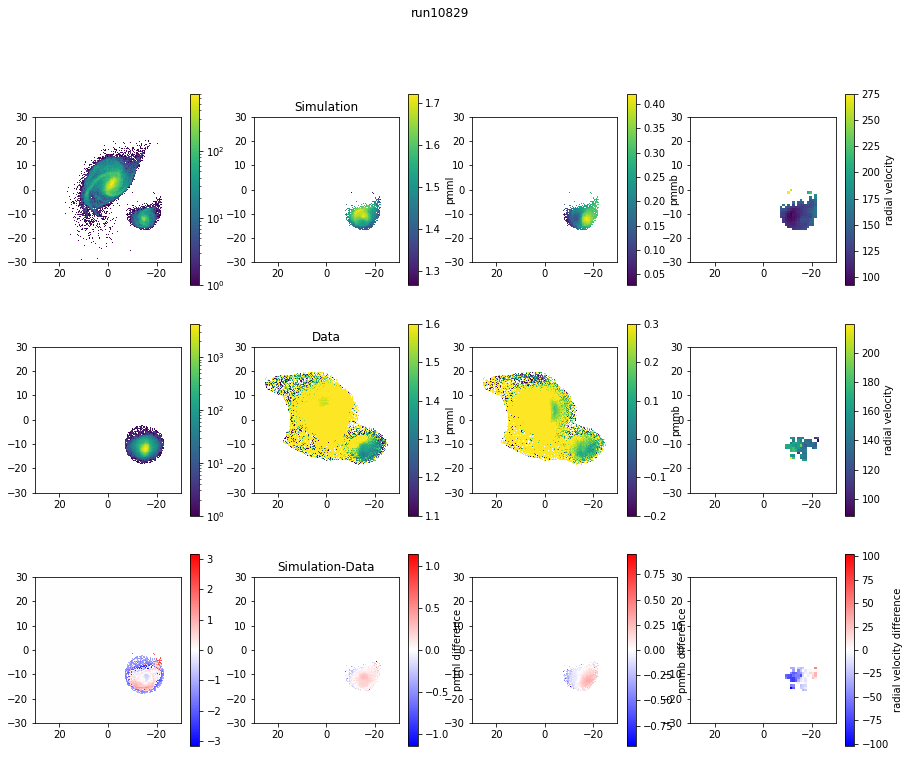

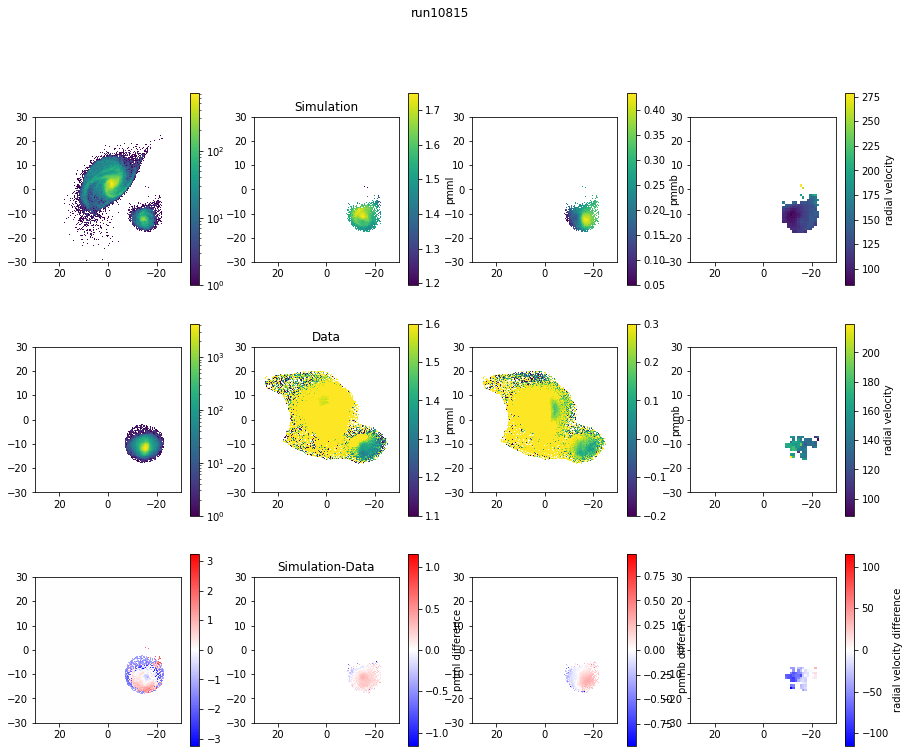

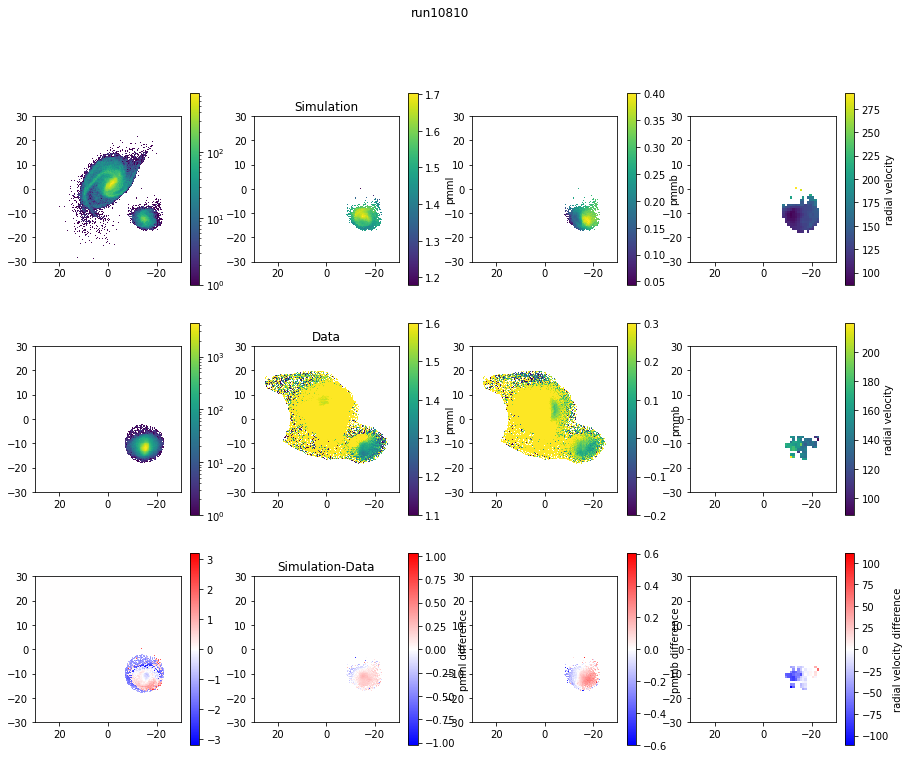

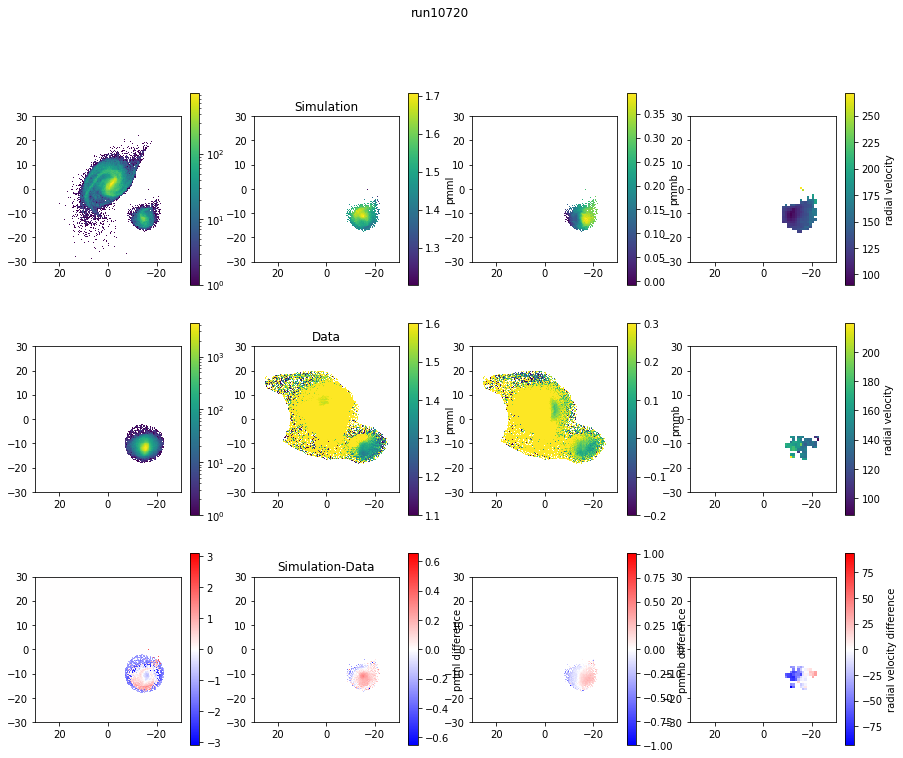

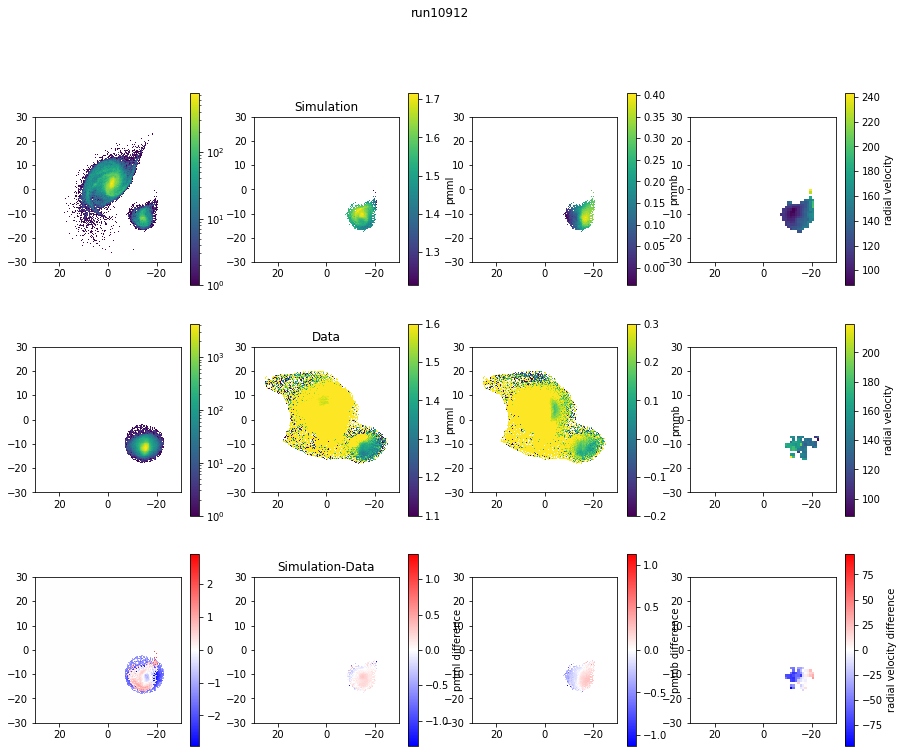

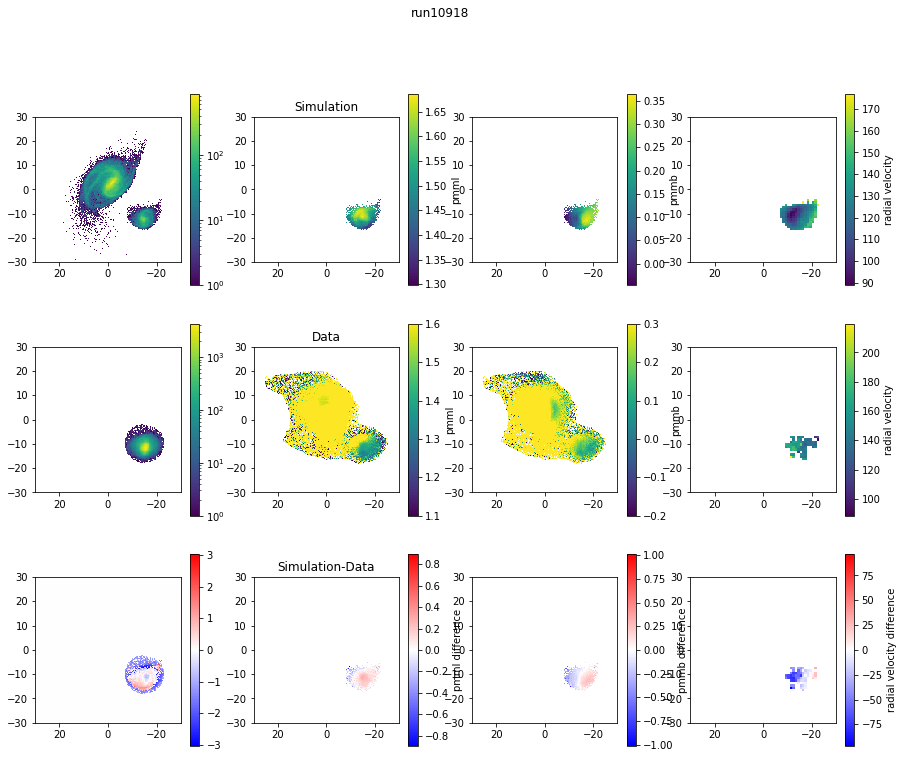

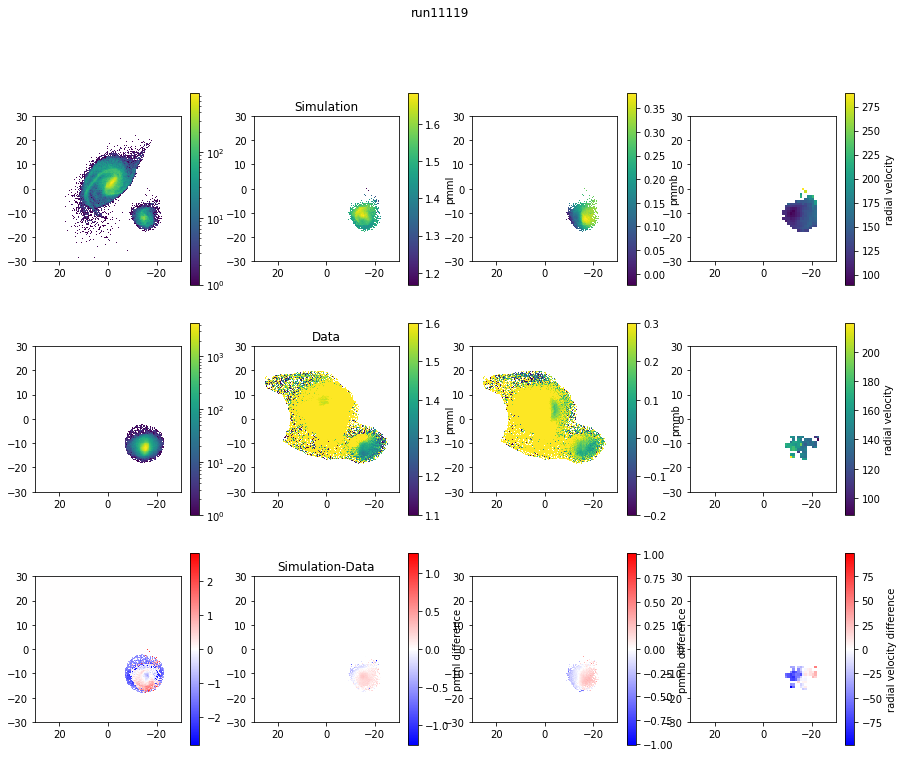

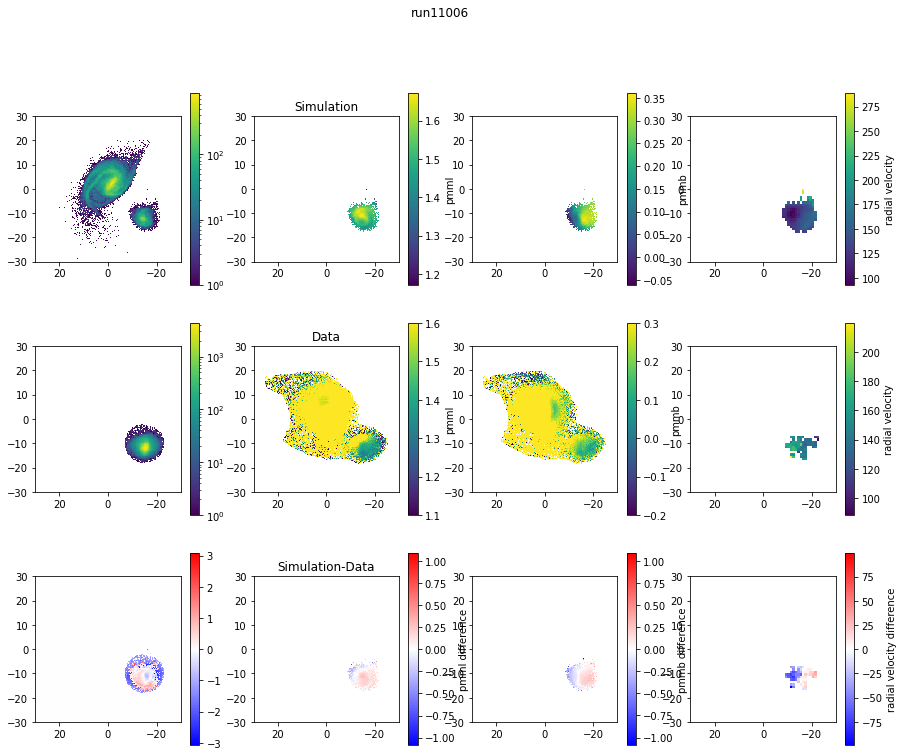

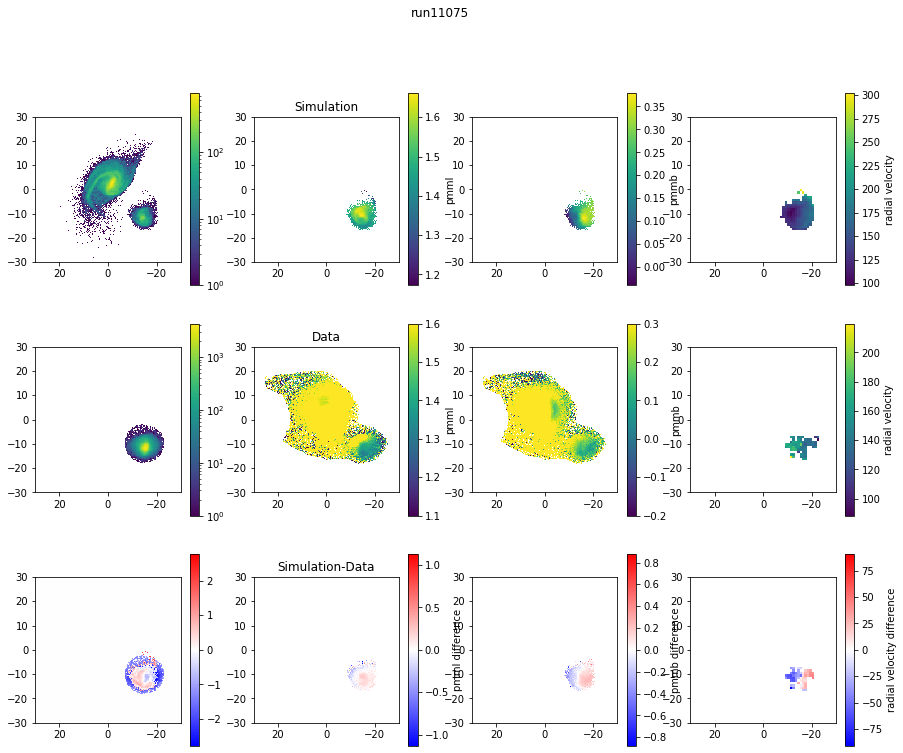

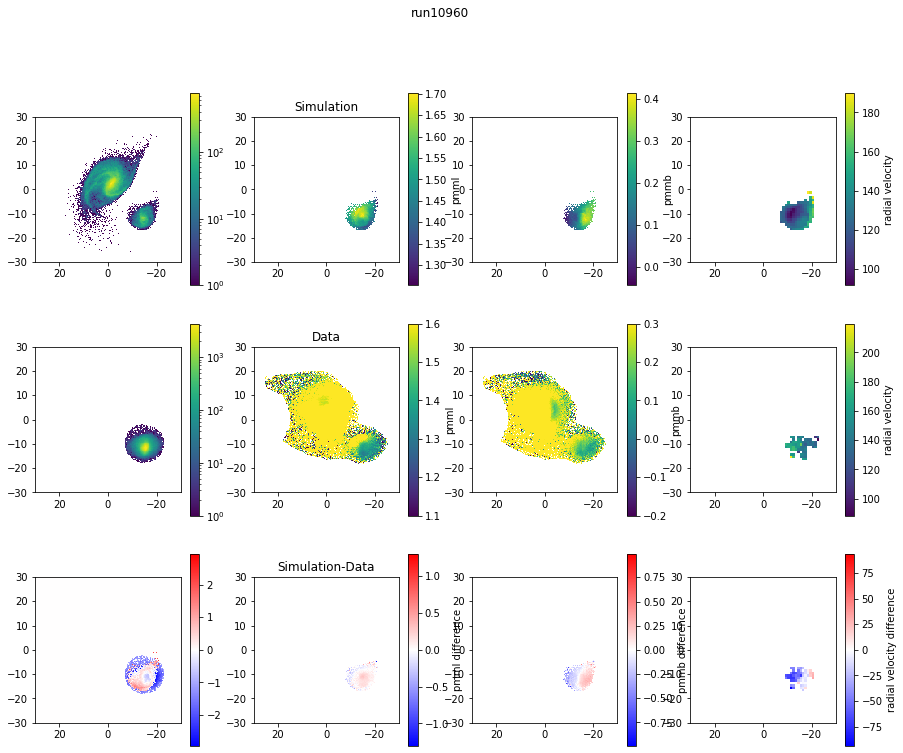

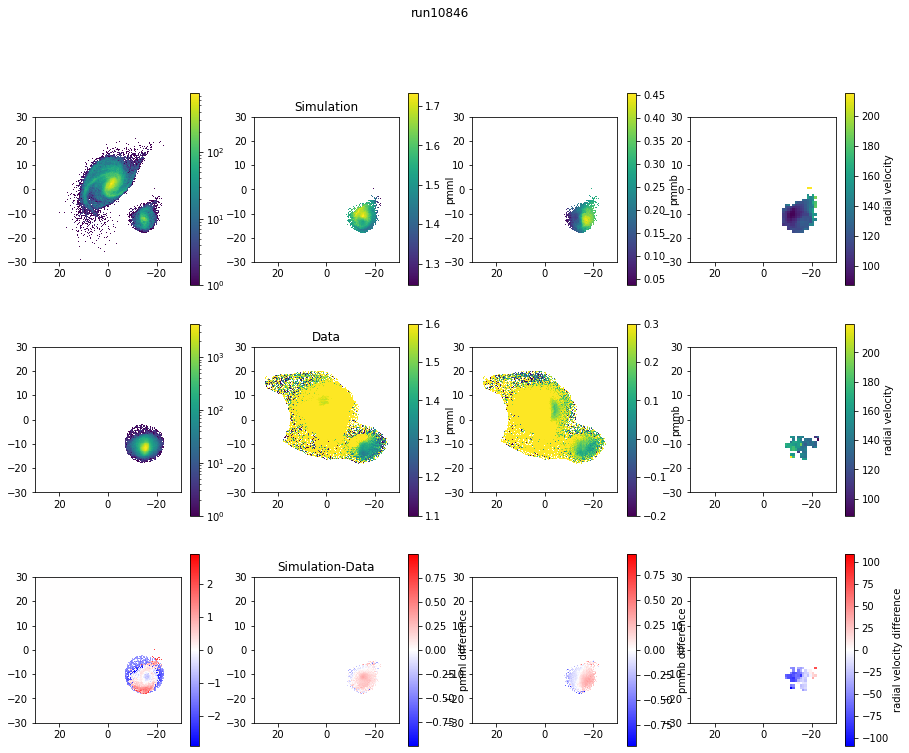

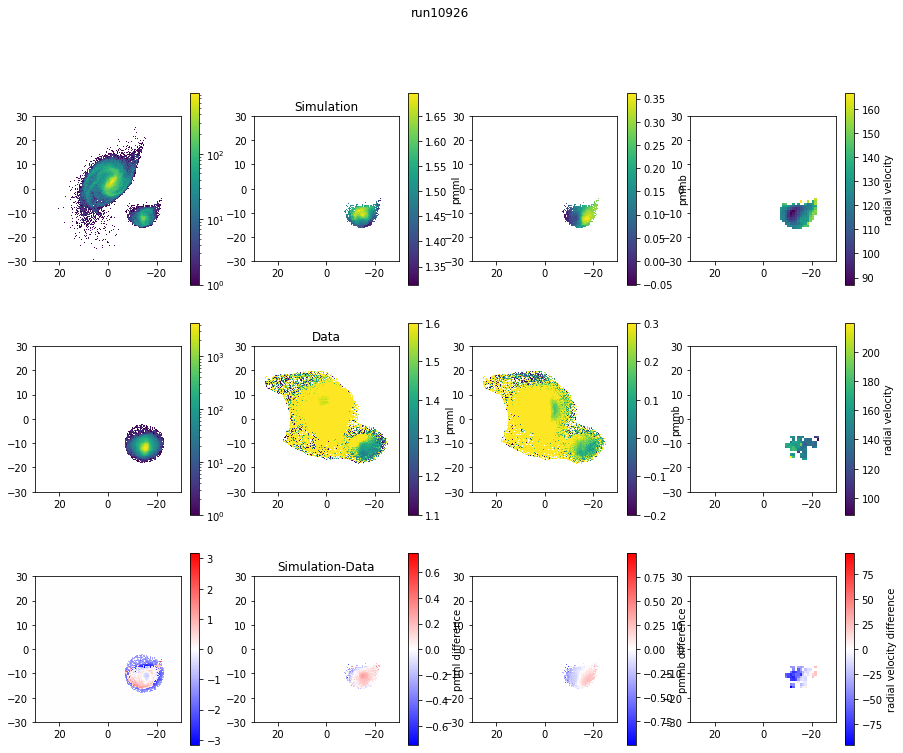

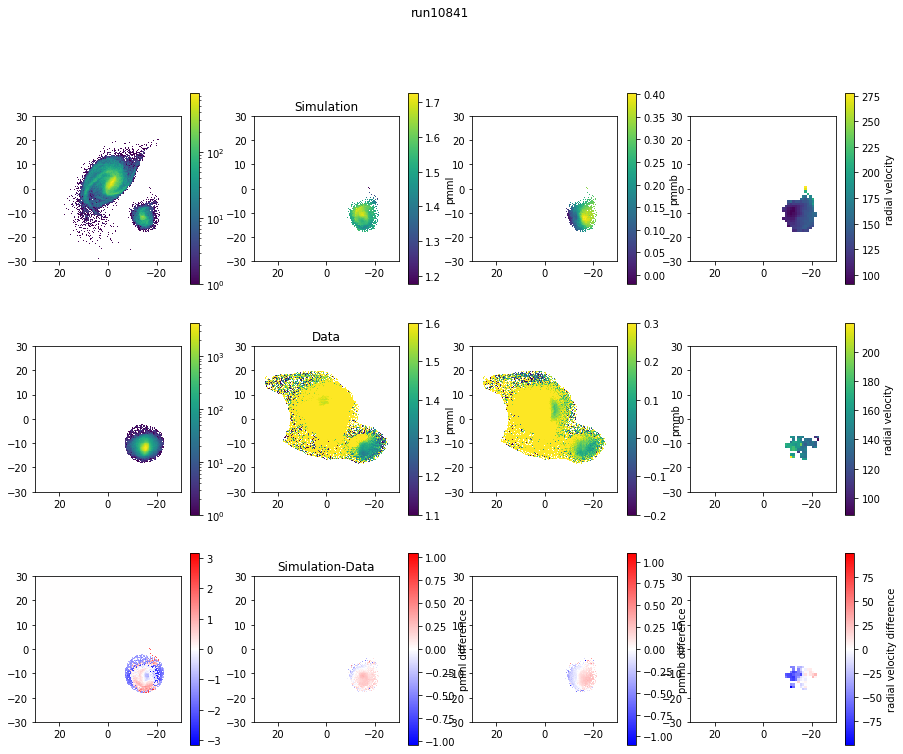

In [4]:
t3 = t2[:20]
extent = [-30,30,-30,30]
for line in t3:
    im1 = np.load('imfiles2/run{}a.npy'.format(int(line['run'])))
    im4 = np.load('imfiles2/run{}w.npy'.format(int(line['run'])))
    plt.figure(figsize=(15,12))
    plt.subplot(3,4,1)
    plt.imshow(im1.T,origin='lower',extent=extent,norm=LN(),interpolation='none')
    plt.xlim((30,-30))
    plt.colorbar()
    plt.subplot(3,4,2)
    im2 = np.load('imfiles2/run{}pmml.npy'.format(int(line['run'])))
    plt.imshow(im2.T,origin='lower',extent=extent,interpolation='none')
    plt.title('Simulation')
    plt.xlim((30,-30))
    plt.colorbar(label='pmml')
    plt.subplot(3,4,3)
    im3 = np.load('imfiles2/run{}pmmb.npy'.format(int(line['run'])))
    plt.imshow(im3.T,origin='lower',extent=extent,interpolation='none')
    plt.xlim((30,-30))
    plt.colorbar(label='pmmb')
    plt.subplot(3,4,4)
    im8 = np.load('imfiles2/run{}rv.npy'.format(int(line['run'])))
    plt.imshow(im8.T,origin='lower',extent=extent,interpolation='none')
    plt.xlim((30,-30))
    plt.colorbar(label='radial velocity')
    plt.subplot(3,4,9)
    g1 = np.load('gaiamapsmc.npy')
    im5 = np.log10(im4)-np.log10(g1)
    vv1 = np.max(np.abs(im5))
    plt.imshow(im5.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv1,vmax=vv1)
    plt.xlim((30,-30))
    plt.colorbar()
    plt.subplot(3,4,10)
    g2 = np.load('gaiapmml.npy'.format(int(line['run'])))
    im6 = im2-g2
    vv2 = np.max(np.abs(im6[np.where(~np.isnan(im6))]))
    plt.imshow(im6.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv2,vmax=vv2)
    plt.title('Simulation-Data')
    plt.xlim((30,-30))
    plt.colorbar(label='pmml difference')
    plt.subplot(3,4,11)
    g3 = np.load('gaiapmmb.npy'.format(int(line['run'])))
    im7 = im3-g3
    vv3 = np.max(np.abs(im7[np.where(~np.isnan(im7))]))
    plt.imshow(im7.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv3,vmax=vv3)
    plt.xlim((30,-30))
    plt.colorbar(label='pmmb difference')
    plt.subplot(3,4,12)
    d1 = np.load('datarv.npy'.format(int(line['run'])))
    im9 = im8-d1
    vv3 = np.max(np.abs(im9[np.where(~np.isnan(im9))]))
    plt.imshow(im9.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv3,vmax=vv3)
    plt.xlim((30,-30))
    plt.colorbar(label='radial velocity difference')
    plt.subplot(3,4,5)
    g1[(np.where(g1==0.1))] = 0
    plt.imshow(g1.T,origin='lower',extent=extent,interpolation='none',norm=LN())
    plt.xlim((30,-30))
    plt.colorbar()
    plt.subplot(3,4,6)
    plt.imshow(g2.T,origin='lower',extent=extent,interpolation='none',vmin=1.1,vmax=1.6)
    plt.title('Data')
    plt.xlim((30,-30))
    plt.colorbar(label='pmml')
    plt.subplot(3,4,7)
    plt.imshow(g3.T,origin='lower',extent=extent,interpolation='none',vmin=-0.2,vmax=0.3)
    plt.xlim((30,-30))
    plt.colorbar(label='pmmb')
    plt.subplot(3,4,8)
    plt.imshow(d1.T,origin='lower',extent=extent,interpolation='none')#,vmin=-0.2,vmax=0.3)
    plt.xlim((30,-30))
    plt.colorbar(label='radial velocity')
    plt.suptitle('run{}'.format(int(line['run'])))

In [6]:
t3

<Table length=20>
  run           r          ...       vdist               fit        
float64      float64       ...      float64            float64      
------- ------------------ ... ------------------ ------------------
11117.0  41.46844535153189 ...  35.66590610628521  21.98461816860423
11012.0  42.08733752740128 ...  44.62755092224645 21.879763502080245
10712.0  44.12549572376264 ...  34.17747820438842 21.793169098946226
11096.0 41.510856760124994 ... 24.307526706489373 21.764495264491345
10940.0 43.275912262606354 ...  36.52047647885123 21.759855606142406
10988.0  43.97422255231469 ...  36.06721154627602 21.742697858496758
    ...                ... ...                ...                ...
11119.0  41.92715388942058 ... 35.800791580767736 21.026728346205605
11006.0  43.67621886774037 ...  32.68524244658953  21.01027822815239
11075.0 40.730940761722316 ... 28.227941135082105 20.994105778762734
10960.0  42.67058514538005 ...  37.81891863295259 20.846672913560834
10846.0 41.138239548616454 ...  49.49424568985808 20.726326614374482
10926.0 45.015851393311564 ... 36.363298210102116 20.605692440682986
10841.0  41.76819802720392 ... 43.529523535651826  20.58340159280203